<a href="https://colab.research.google.com/github/st20310132/air-pollution-analysis/blob/main/st120310132_CMP7005_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assessment Title: PRAC1**
# **Module Code: CMP7005**
# **Module Title: Programming for Data Analysis**
# **Student ID: st20310132**
# **Submitted to: Dr. Amrita Prasad**
Git Repo: https://github.com/st20310132/air-pollution-analysis.git  


#**Task 1:**
#**Data Handling:**
For comprehensive data analysis select and download one site from urban, suburban,
rural, and Industrial/hotspots, import the datasets into the development environment, and merge the
datasets into one to start the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os


# Seaborn style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)


# Google Drive initialization
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab_Notebooks'


# Four sites selected of each category
sites = {
    'urban': 'Dongsi',
    'suburban': 'Shunyi',
    'rural': 'Dingling',
    'industrial': 'Gucheng'
}

# Dataframe set dictionary initialization
dfs = {}

# Fetching datasets
for area_type, site in sites.items():
    # Look for files containing the site name
    file_pattern = f"*{site}*.csv"
    matching_files = [f for f in os.listdir(data_path) if site in f and f.endswith('.csv')]

    if matching_files:
        file_name = matching_files[0]  # Take the first matching file
        file_path = os.path.join(data_path, file_name)
        dfs[area_type] = pd.read_csv(file_path)
        print(f"Loaded {area_type} site: {site} - Shape: {dfs[area_type].shape}")
    else:
        print(f"No file found for {area_type} site: {site}")

# Add columns to identify the site type
for area_type, df in dfs.items():
    df['site_type'] = area_type
    df['site_name'] = sites[area_type]

# Merge all datasets
if dfs:
    merged_df = pd.concat(dfs.values(), ignore_index=True)
    print("\nMerged Dataset Shape:", merged_df.shape)

    # Display the first few rows
    print("\nFirst 5 rows of the merged dataset:")
    print(merged_df.head())

    # Basic information about the merged dataset
    print("\nDataset Information:")
    merged_df.info()

    # Check for missing values
    print("\nMissing Values Count:")
    print(merged_df.isnull().sum())

    # Save the merged dataset for future use
    merged_file_path = os.path.join(data_path, 'merged_air_quality_data.csv')
    merged_df.to_csv(merged_file_path, index=False)
    print(f"\nMerged dataset saved to: {merged_file_path}")
else:
    print("No datasets were loaded. Please check file names and try again")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded urban site: Dongsi - Shape: (35064, 18)
Loaded suburban site: Shunyi - Shape: (35064, 18)
Loaded rural site: Dingling - Shape: (35064, 18)
Loaded industrial site: Gucheng - Shape: (35064, 18)

Merged Dataset Shape: (140256, 20)

First 5 rows of the merged dataset:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station site_type site_name  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi     urban    Dongsi  
1  1025.1 -22.1 

# **Task 2:**  
# **Exploratory Data Analysis (EDA):**
# **a) Fundamental data understanding:**
Demonstrate the understanding of the data to gain general
insights about the data, which covers the number of rows and columns, values in the data, data
types, and Missing values in the dataset (Briefly interpret the datasets to demonstrate
understanding of the data).

DATASET OVERVIEW
Dataset Shape: 140256 rows and 20 columns


Data Types of each column:
No             int64
year           int64
month          int64
day            int64
hour           int64
PM2.5        float64
PM10         float64
SO2          float64
NO2          float64
CO           float64
O3           float64
TEMP         float64
PRES         float64
DEWP         float64
RAIN         float64
wd            object
WSPM         float64
station       object
site_type     object
site_name     object
dtype: object


Columns in the dataset: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'site_type', 'site_name']


Statistical Summary of Numerical Columns:


No           year          month            day           hour  \
count  140256.000  140256.000000  140256.000000  140256.000000  140256.000000   
mean    17532.500    2014.662560       6.522930      15.729637      11.500000   
std     10122.141       1.177201       3.448715       8.800123       6.922211   
min         1.000    2013.000000       1.000000       1.000000       0.000000   
25%      8766.750    2014.000000       4.000000       8.000000       5.750000   
50%     17532.500    2015.000000       7.000000      16.000000      11.500000   
75%     26298.250    2016.000000      10.000000      23.000000      17.250000   
max     35064.000    2017.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  137168.000000  138118.000000  137060.000000  135388.000000   
mean       78.887641     102.952873      14.812565      45.289000   
std        81.267769      92.174343      20.150253      34.070603   
min         2.000000       2.000000       0.285600       1.026500   
25%        19.000000      34.000000       2.000000      18.000000   
50%        54.000000      80.000000       7.000000      37.000000   
75%       110.000000     145.000000      19.000000      65.000000   
max       941.000000     999.000000     500.000000     276.000000   

                  CO             O3           TEMP           PRES  \
count  131468.000000  136160.000000  140081.000000  140085.000000   
mean     1185.845035      59.655892      13.652527    1010.550217   
std      1134.736604      56.203232      11.401465      10.448008   
min       100.000000       0.214200     -16.800000     982.400000   
25%       400.000000      14.000000       3.200000    1002.100000   
50%       800.000000      49.000000      14.600000    1010.200000   
75%      1500.000000      84.000000      23.400000    1018.800000   
max     10000.000000    1071.000000      41.600000    1042.800000   

                DEWP           RAIN           WSPM  
count  140078.000000  140091.000000  140113.000000  
mean        2.257175       0.062484       1.716392  
std        13.792482       0.785582       1.277251  
min       -36.000000       0.000000       0.000000  
25%        -9.200000       0.000000       0.900000  
50%         2.700000       0.000000       1.400000  
75%        14.900000       0.000000       2.200000  
max        28.800000      52.100000      12.800000



First 5 rows of the dataset:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station site_type site_name  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi     urban    Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi     urban    Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi     urban    Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi     urban    Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi     urban    Dongsi


Last 5 rows of the dataset:


No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
140251  35060  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0   
140252  35061  2017      2   28    20   27.0  83.0  6.0  60.0  700.0  26.0   
140253  35062  2017      2   28    21   22.0  37.0  7.0  52.0  600.0  27.0   
140254  35063  2017      2   28    22    9.0  23.0  3.0  13.0  400.0  57.0   
140255  35064  2017      2   28    23   12.0  48.0  5.0  48.0  600.0  28.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM  station   site_type site_name  
140251  12.8  1009.9 -17.0   0.0  NNW   3.1  Gucheng  industrial   Gucheng  
140252  11.1  1010.4 -15.5   0.0   NW   1.9  Gucheng  industrial   Gucheng  
140253  10.5  1010.8 -15.9   0.0    N   2.3  Gucheng  industrial   Gucheng  
140254   8.9  1010.9 -14.9   0.0   NE   1.6  Gucheng  industrial   Gucheng  
140255   6.2  1010.5 -13.4   0.0  NNE   0.7  Gucheng  industrial   Gucheng



Memory Usage: 50.63 MB


MISSING VALUES ANALYSIS
Missing Values Information:


Column  Missing Values  Percentage (%)
0          CO            8788        6.265686
1         NO2            4868        3.470796
2          O3            4096        2.920374
3         SO2            3196        2.278690
4       PM2.5            3088        2.201688
5        PM10            2138        1.524355
6          wd             860        0.613164
7        DEWP             178        0.126911
8        TEMP             175        0.124772
9        PRES             171        0.121920
10       RAIN             165        0.117642
11       WSPM             143        0.101956
12        day               0        0.000000
13      month               0        0.000000
14       year               0        0.000000
15         No               0        0.000000
16       hour               0        0.000000
17    station               0        0.000000
18  site_type               0        0.000000
19  site_name               0        0.000000

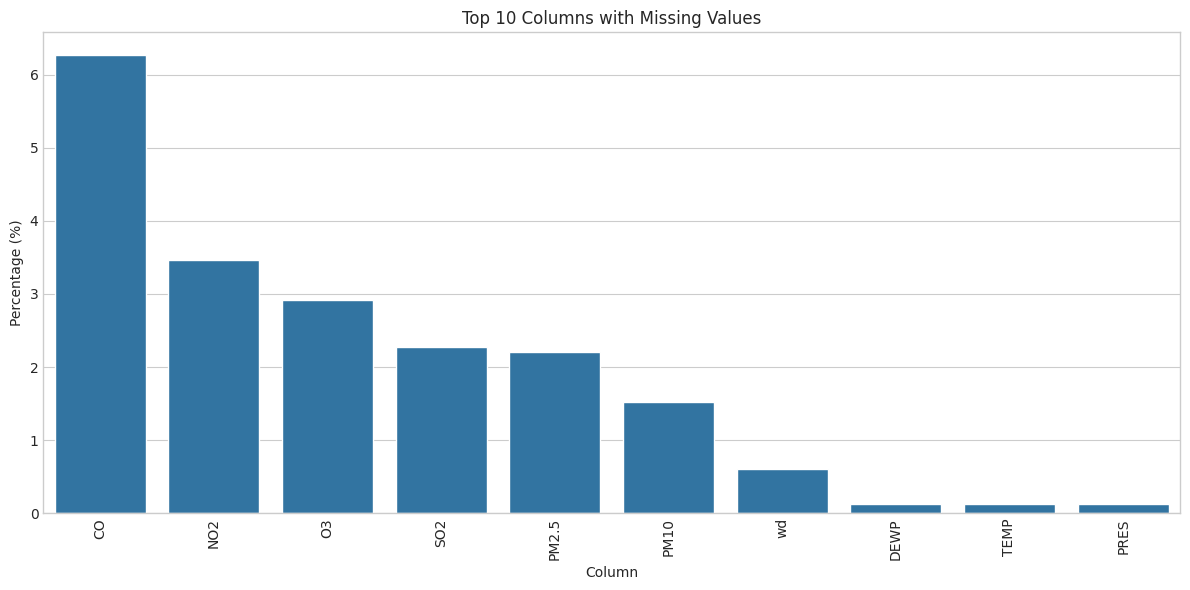



DATA DISTRIBUTION
Value counts for wd:
wd
N      13468
NE     11731
NW     11508
NNE    10989
NNW     9739
E       8751
ENE     8467
WNW     8348
ESE     8222
S       8203
SSE     7771
SE      7710
SSW     7427
SW      6327
W       5904
WSW     4831
Name: count, dtype: int64




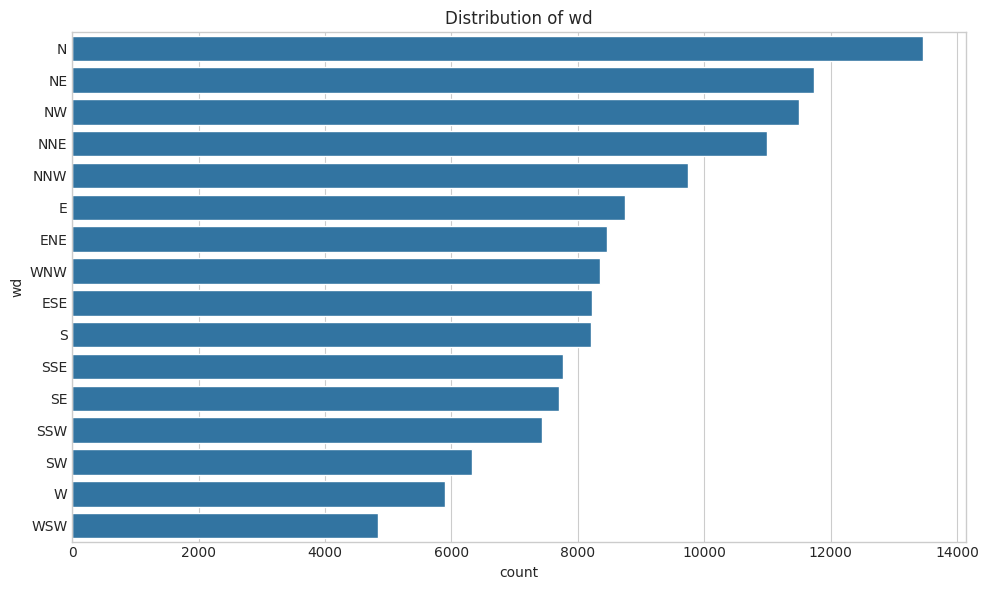

Value counts for station:
station
Dongsi      35064
Shunyi      35064
Dingling    35064
Gucheng     35064
Name: count, dtype: int64




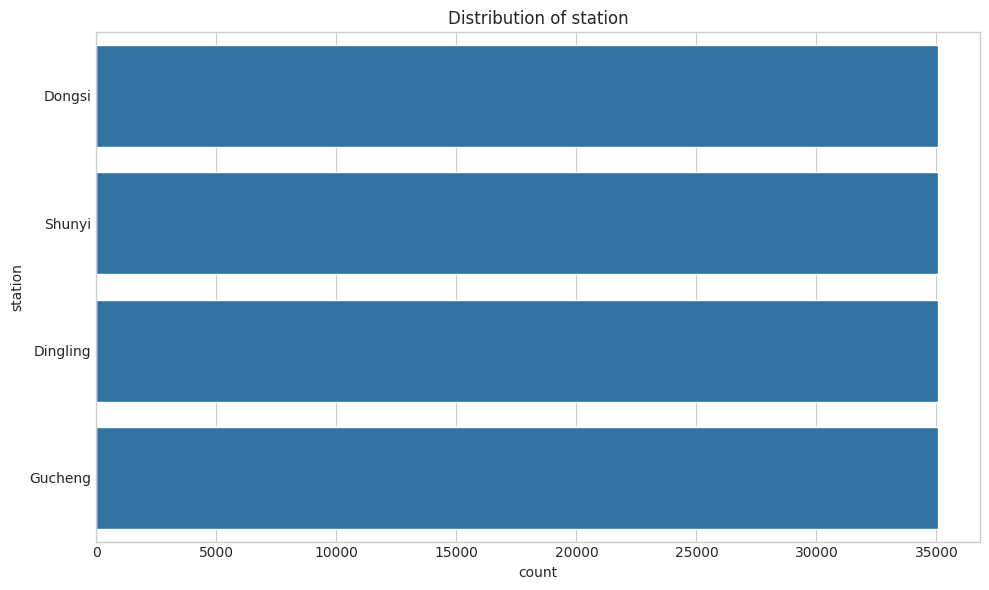

Value counts for site_type:
site_type
urban         35064
suburban      35064
rural         35064
industrial    35064
Name: count, dtype: int64




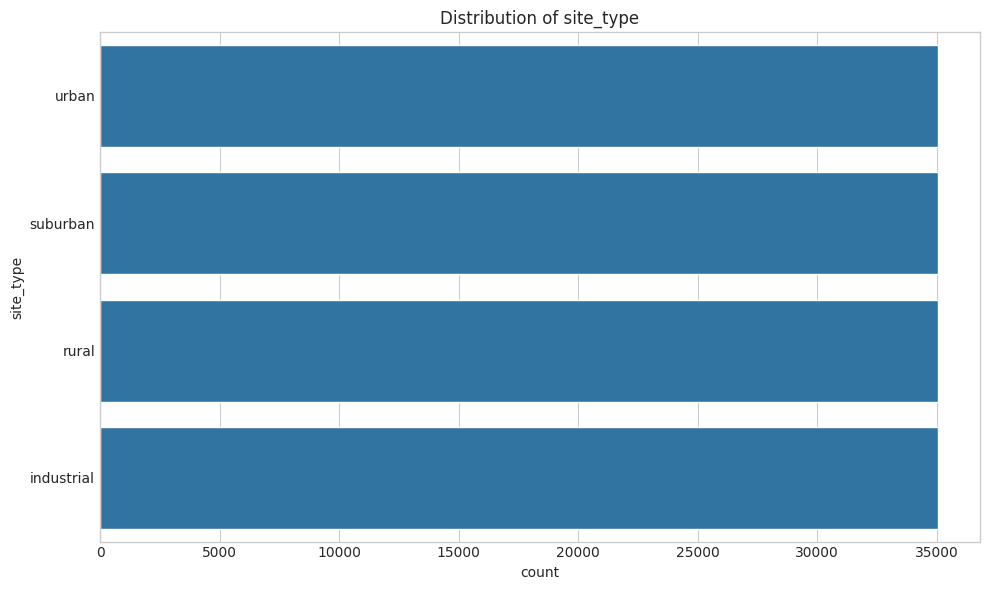

...and 1 more categorical columns
Distribution of Pollutants:


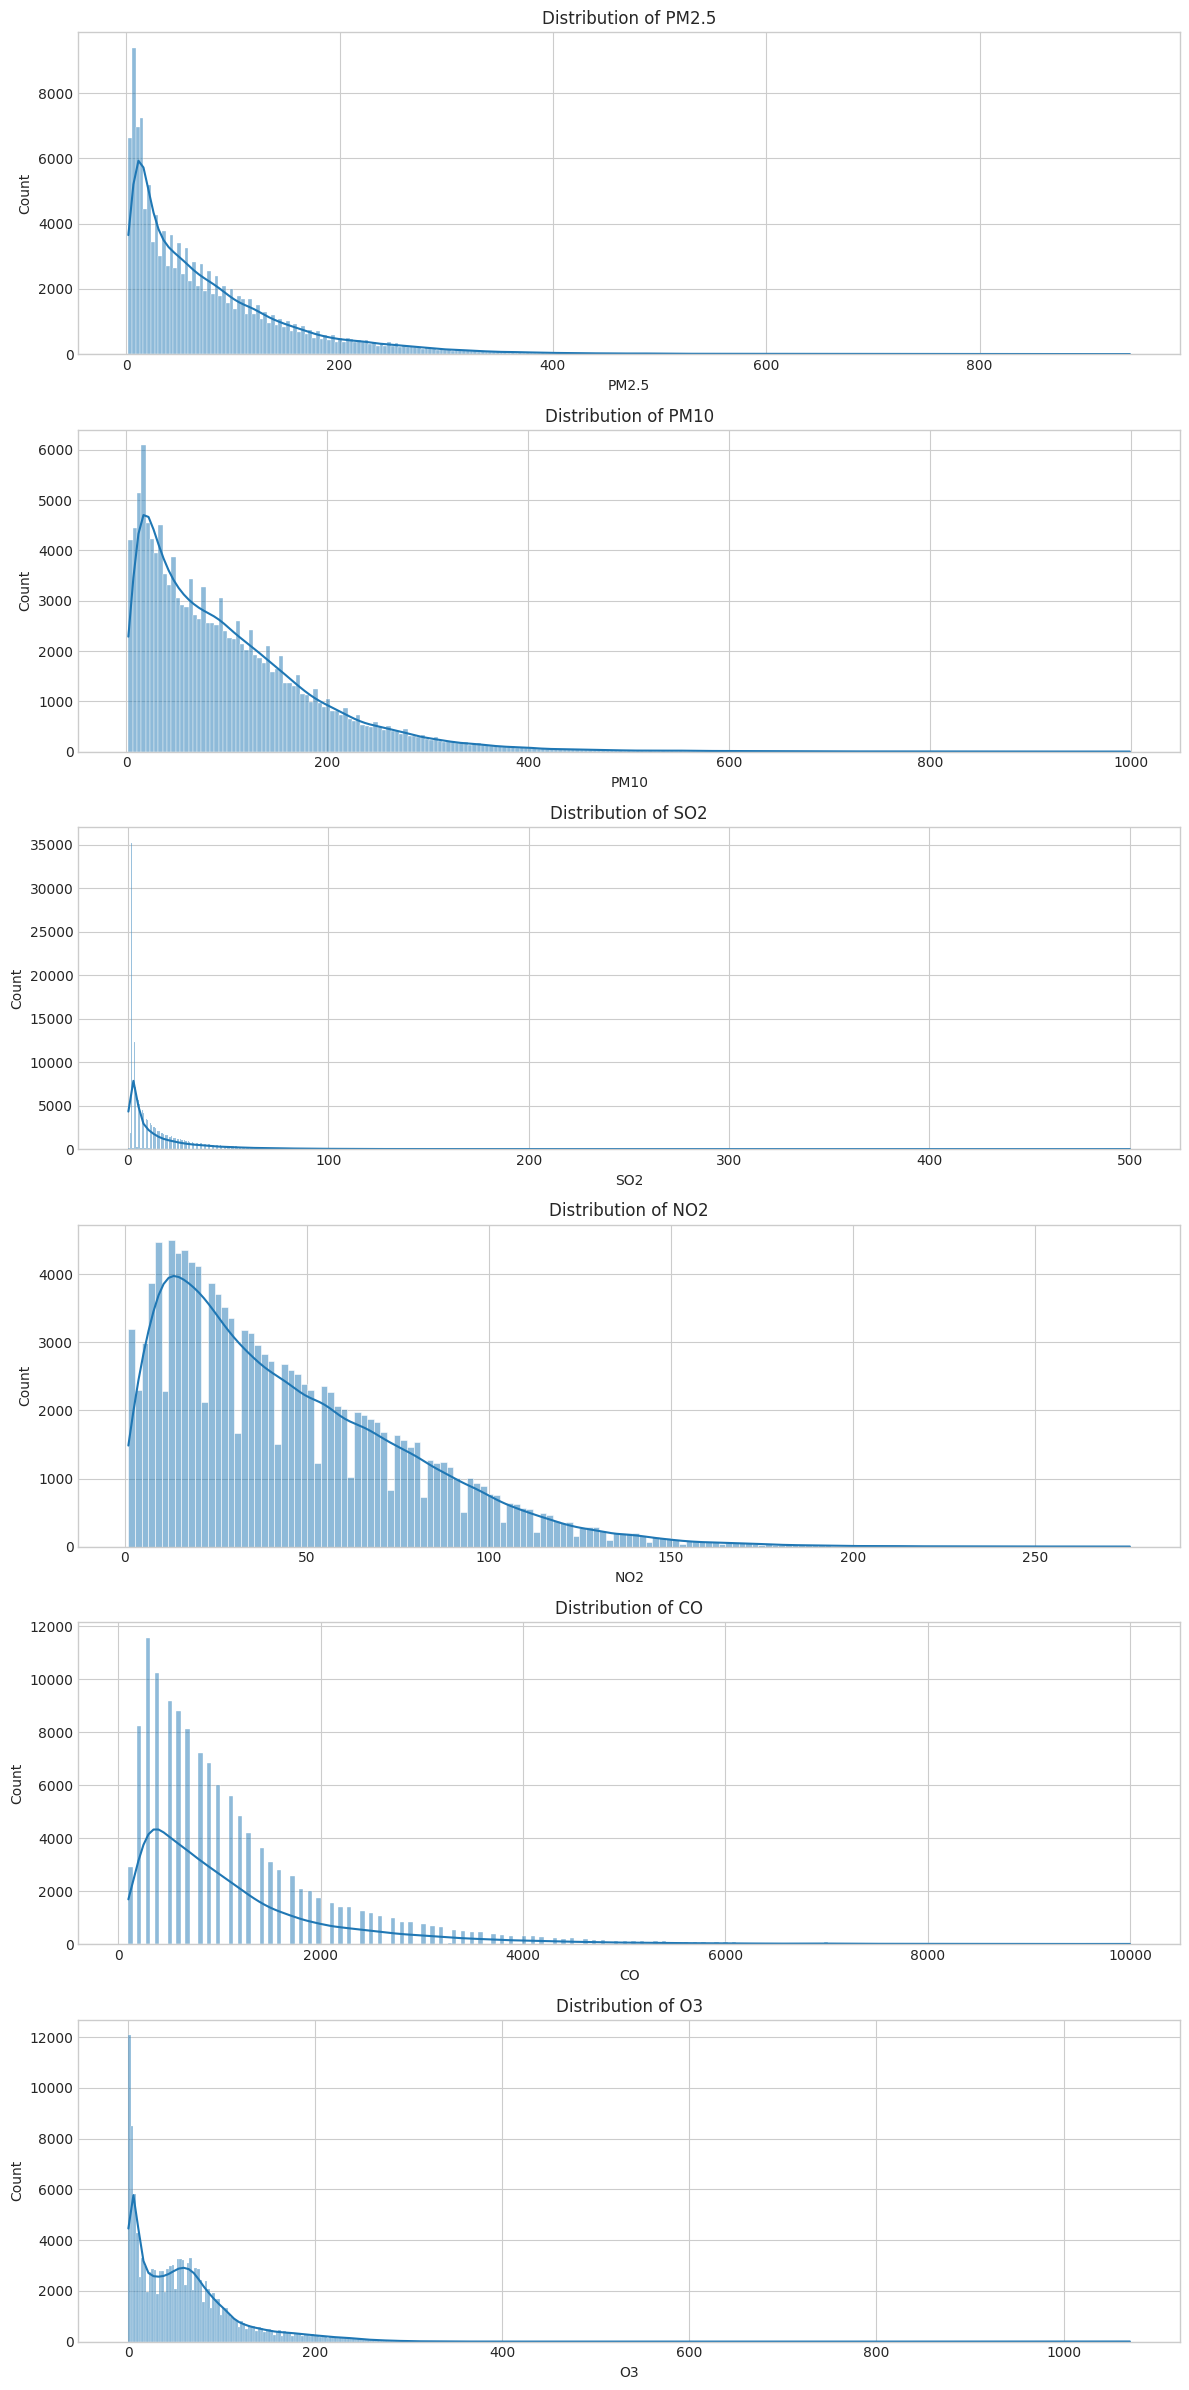



Distribution of Other Numerical Variables:


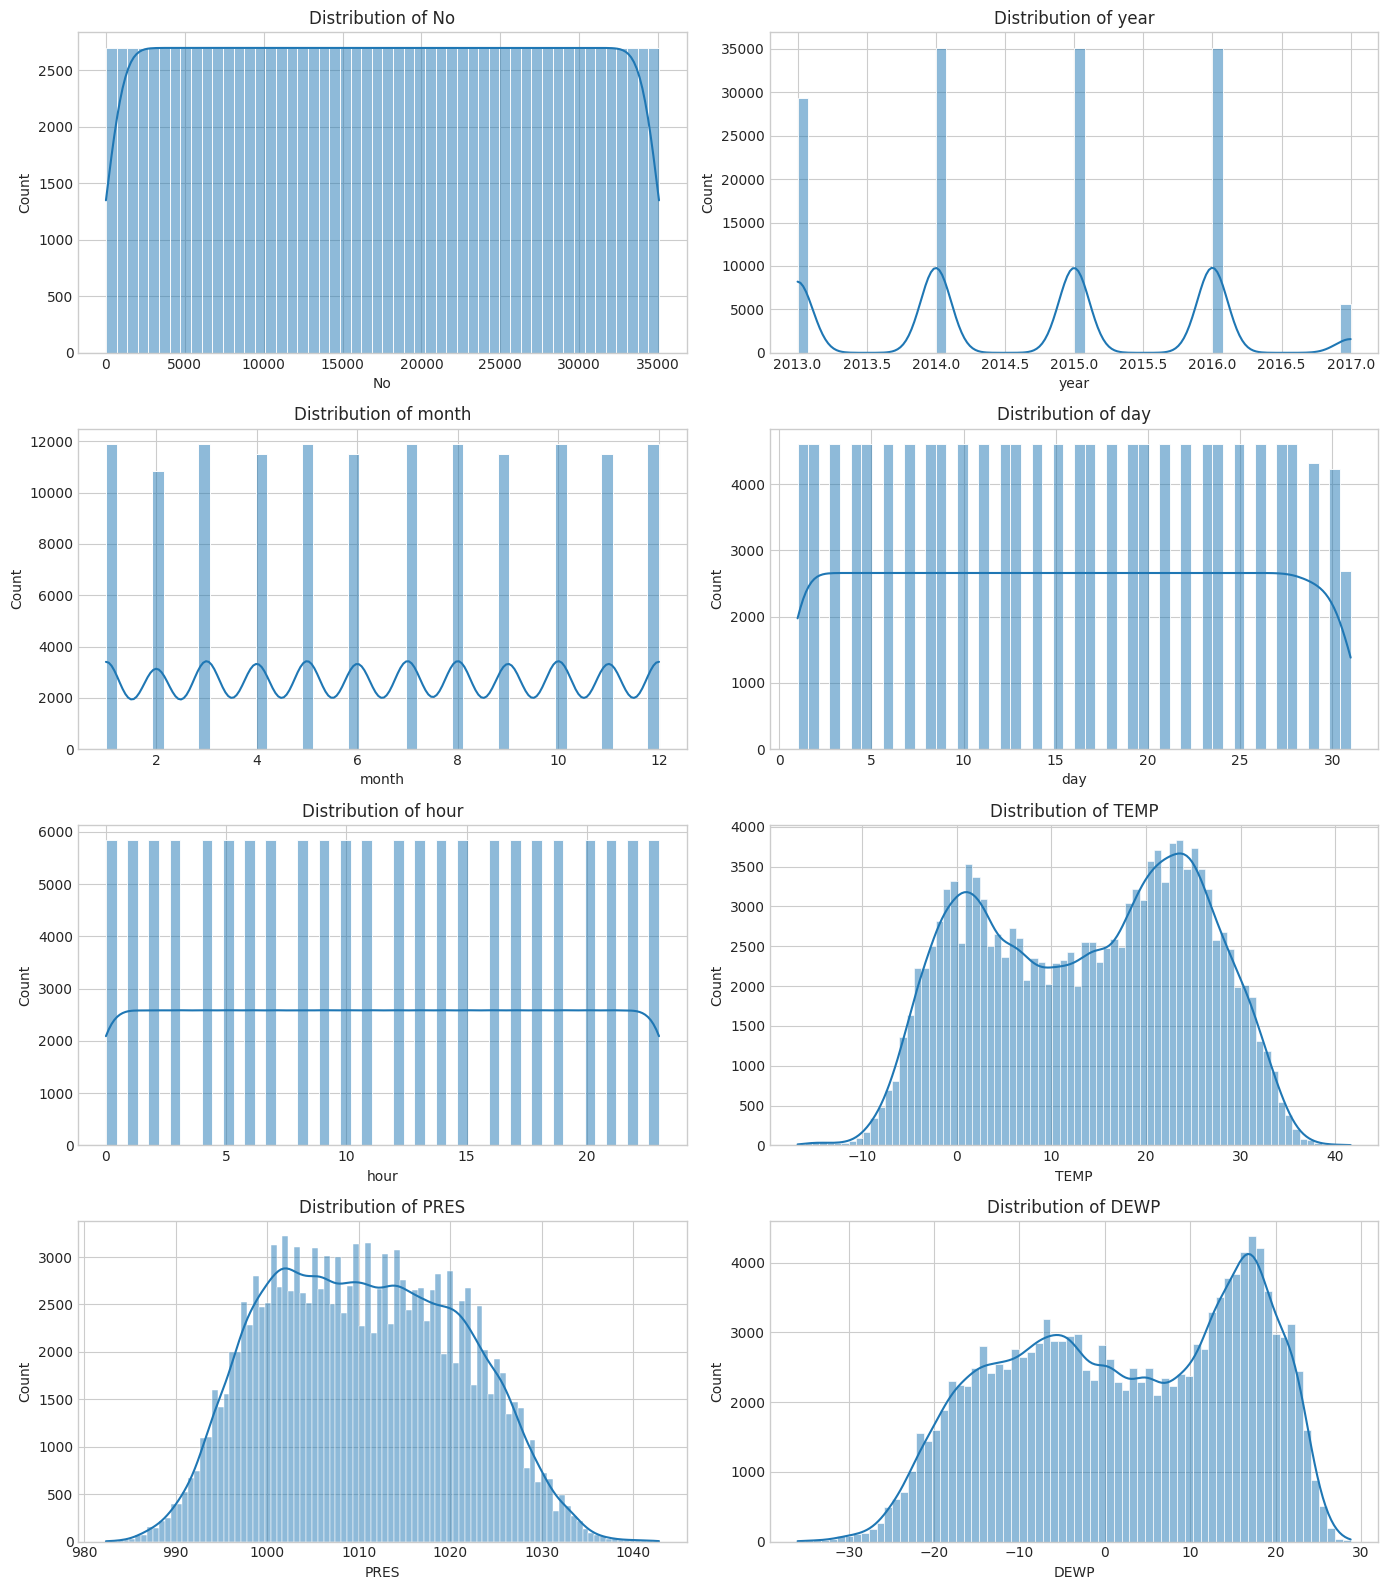



Correlation Analysis:
Correlation Matrix:


No  year  month   day  hour  PM2.5  PM10   SO2   NO2    CO    O3  \
No     1.00  0.97   0.04  0.02  0.00  -0.01 -0.02 -0.19 -0.03  0.02 -0.06   
year   0.97  1.00  -0.20 -0.01 -0.00  -0.01 -0.01 -0.14 -0.05  0.01 -0.03   
month  0.04 -0.20   1.00  0.01 -0.00  -0.00 -0.03 -0.20  0.05  0.04 -0.12   
day    0.02 -0.01   0.01  1.00  0.00   0.00  0.02 -0.00  0.01 -0.02  0.00   
hour   0.00 -0.00  -0.00  0.00  1.00   0.02  0.07  0.04  0.02 -0.01  0.28   
PM2.5 -0.01 -0.01  -0.00  0.00  0.02   1.00  0.88  0.49  0.67  0.79 -0.15   
PM10  -0.02 -0.01  -0.03  0.02  0.07   0.88  1.00  0.46  0.67  0.69 -0.11   
SO2   -0.19 -0.14  -0.20 -0.00  0.04   0.49  0.46  1.00  0.52  0.56 -0.18   
NO2   -0.03 -0.05   0.05  0.01  0.02   0.67  0.67  0.52  1.00  0.72 -0.45   
CO     0.02  0.01   0.04 -0.02 -0.01   0.79  0.69  0.56  0.72  1.00 -0.32   
O3    -0.06 -0.03  -0.12  0.00  0.28  -0.15 -0.11 -0.18 -0.45 -0.32  1.00   
TEMP  -0.13 -0.16   0.13  0.01  0.14  -0.12 -0.08 -0.34 -0.26 -0.32  0.59   
PRES   0.17  0.17  -0.02  0.02 -0.04   0.01 -0.03  0.24  0.15  0.19 -0.45   
DEWP  -0.09 -0.16   0.26  0.02 -0.01   0.12  0.08 -0.27 -0.01 -0.05  0.31   
RAIN   0.01  0.00   0.02 -0.00  0.01  -0.01 -0.03 -0.04 -0.04 -0.01  0.02   
WSPM   0.07  0.11  -0.14 -0.01  0.13  -0.27 -0.19 -0.12 -0.41 -0.30  0.28   

       TEMP  PRES  DEWP  RAIN  WSPM  
No    -0.13  0.17 -0.09  0.01  0.07  
year  -0.16  0.17 -0.16  0.00  0.11  
month  0.13 -0.02  0.26  0.02 -0.14  
day    0.01  0.02  0.02 -0.00 -0.01  
hour   0.14 -0.04 -0.01  0.01  0.13  
PM2.5 -0.12  0.01  0.12 -0.01 -0.27  
PM10  -0.08 -0.03  0.08 -0.03 -0.19  
SO2   -0.34  0.24 -0.27 -0.04 -0.12  
NO2   -0.26  0.15 -0.01 -0.04 -0.41  
CO    -0.32  0.19 -0.05 -0.01 -0.30  
O3     0.59 -0.45  0.31  0.02  0.28  
TEMP   1.00 -0.82  0.82  0.04  0.02  
PRES  -0.82  1.00 -0.74 -0.06  0.08  
DEWP   0.82 -0.74  1.00  0.09 -0.30  
RAIN   0.04 -0.06  0.09  1.00  0.02  
WSPM   0.02  0.08 -0.30  0.02  1.00

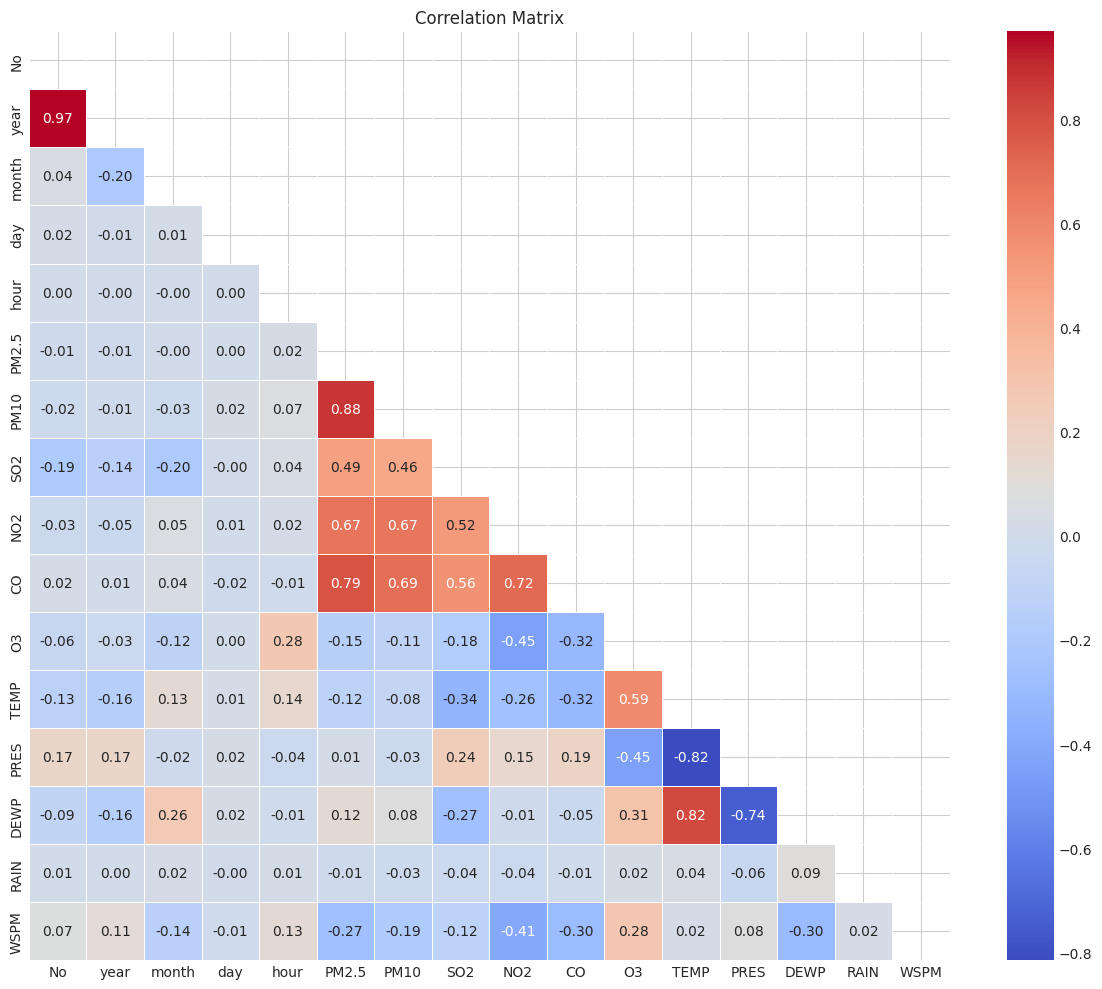



Top 10 Strongest Correlations:


year   No       0.969533
No     year     0.969533
PM10   PM2.5    0.878220
PM2.5  PM10     0.878220
DEWP   TEMP     0.821482
TEMP   DEWP     0.821482
PM2.5  CO       0.788089
CO     PM2.5    0.788089
       NO2      0.717328
NO2    CO       0.717328
dtype: float64



Analyzing temporal patterns using year
Date Range: 1970-01-01 00:00:00.000002013 to 1970-01-01 00:00:00.000002017
Total Time Span: 0 days
Could not convert year to datetime format. Error: Can only use .dt accessor with datetimelike values
SUMMARY OF FINDINGS
1. Dataset contains 140256 observations of 20 variables.
2. The dataset has data from 4 different sites categorized as urban, suburban, rural, industrial.
3. Missing data is present. The column 'CO' has the most missing values (6.27%).
4. Pollutant statistics:
   - PM2.5: Average 78.89, Maximum 941.00
   - PM10: Average 102.95, Maximum 999.00
   - SO2: Average 14.81, Maximum 500.00
   - NO2: Average 45.29, Maximum 276.00
   - CO: Average 1185.85, Maximum 10000.00
   - O3: Average 59.66, Maximum 1071.00
5. The urban site type shows the highest average PM2.5 levels (86.19).
6. The strongest correlation is between year and No (r=0.97).


In [ ]:
from IPython.display import display

# Load the merged dataset
merged_file_path = '/content/drive/MyDrive/Colab_Notebooks/merged_air_quality_data.csv'
df = pd.read_csv(merged_file_path)

# ------------- Basic Dataset Information -------------
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

# Dataset Dimensions
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")
print("\n")

# Data Types Information
print("Data Types of each column:")
print(df.dtypes)
print("\n")

# Column Names
print(f"Columns in the dataset: {df.columns.tolist()}")
print("\n")

# Basic Statistical Summary
print("Statistical Summary of Numerical Columns:")
display(df.describe())
print("\n")

# First and Last Rows
print("First 5 rows of the dataset:")
display(df.head())
print("\nLast 5 rows of the dataset:")
display(df.tail())
print("\n")

# Memory Usage
memory_usage = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert to MB
print(f"Memory Usage: {memory_usage:.2f} MB")
print("\n")

# ------------- Missing Values Analysis -------------
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Count of Missing Values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage (%)': missing_percentage.values
})
missing_df = missing_df.sort_values('Missing Values', ascending=False).reset_index(drop=True)
print("Missing Values Information:")
display(missing_df)
print("\n")

# Visualize Missing Values (for columns with missing values)
missing_columns = missing_df[missing_df['Missing Values'] > 0]
if not missing_columns.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Column', y='Percentage (%)', data=missing_columns.head(10))
    plt.title('Top 10 Columns with Missing Values')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")
print("\n")

# ------------- Data Distribution -------------
print("="*80)
print("DATA DISTRIBUTION")
print("="*80)

# Distribution of Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    # Print value counts
    print(f"Value counts for {col}:")
    value_counts = df[col].value_counts()
    print(value_counts)
    print("\n")

    # Plot distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=value_counts.index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Only show the first 3 categorical columns to avoid too many plots
    if categorical_cols.index(col) >= 2:
        print(f"...and {len(categorical_cols) - 3} more categorical columns")
        break

# Distribution of Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Focus on pollutants first if they exist
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutants_present = [col for col in pollutant_cols if col in numerical_cols]

if pollutants_present:
    print("Distribution of Pollutants:")
    fig, axes = plt.subplots(len(pollutants_present), 1, figsize=(12, 4*len(pollutants_present)))
    if len(pollutants_present) == 1:
        axes = [axes]  # Ensure axes is iterable even with one subplot

    for i, pollutant in enumerate(pollutants_present):
        sns.histplot(df[pollutant].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {pollutant}')
        axes[i].set_xlabel(pollutant)

    plt.tight_layout()
    plt.show()
    print("\n")

# Additional numerical columns (non-pollutants)
other_numerical = [col for col in numerical_cols if col not in pollutants_present]
if other_numerical:
    print("Distribution of Other Numerical Variables:")

    # Display up to 8 other numerical columns in a grid
    display_cols = other_numerical[:min(8, len(other_numerical))]
    rows = (len(display_cols) + 1) // 2  # 2 columns per row

    fig, axes = plt.subplots(rows, 2, figsize=(14, 4*rows))
    axes = axes.flatten() if rows > 1 else [axes]

    for i, col in enumerate(display_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

    # Hide any unused subplots
    for j in range(len(display_cols), len(axes)):
        if len(axes) > len(display_cols):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    print("\n")

# Correlation Analysis (for numerical columns)
if len(numerical_cols) > 1:
    print("Correlation Analysis:")
    corr_matrix = df[numerical_cols].corr()

    # Display correlation matrix
    print("Correlation Matrix:")
    display(corr_matrix.round(2))
    print("\n")

    # Visualize correlation matrix
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Create a mask for the upper triangle
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    print("\n")

    # Find strongest correlations
    corrs = corr_matrix.unstack().sort_values(ascending=False)
    # Remove self-correlations (value = 1.0)
    corrs = corrs[corrs < 1.0]

    print("Top 10 Strongest Correlations:")
    display(corrs.head(10))
    print("\n")

# Temporal patterns
date_cols = [col for col in df.columns if any(time_kw in col.lower() for time_kw in ['date', 'time', 'year'])]
if date_cols:
    date_col = date_cols[0]  # Use the first date column found
    print(f"Analyzing temporal patterns using {date_col}")

    # Convert to datetime if it's not already
    if df[date_col].dtype != 'datetime64[ns]':
        try:
            df[date_col] = pd.to_datetime(df[date_col])

            # Check the date range
            min_date = df[date_col].min()
            max_date = df[date_col].max()
            print(f"Date Range: {min_date} to {max_date}")
            print(f"Total Time Span: {(max_date - min_date).days} days")

            # Add year, month columns for time analysis
            df['year'] = df[date_col].dt.year
            df['month'] = df[date_col].dt.month

            # Plot time trends for a pollutant (e.g., PM2.5)
            if 'PM2.5' in df.columns:
                plt.figure(figsize=(15, 6))
                monthly_data = df.groupby([df[date_col].dt.year, df[date_col].dt.month])['PM2.5'].mean().reset_index()
                monthly_data['date'] = pd.to_datetime(monthly_data[[date_col + '.dt.year', date_col + '.dt.month']].rename(
                    columns={date_col + '.dt.year': 'year', date_col + '.dt.month': 'month'}).assign(day=1))

                plt.plot(monthly_data['date'], monthly_data['PM2.5'])
                plt.title('Average PM2.5 Levels Over Time')
                plt.xlabel('Date')
                plt.ylabel('PM2.5 Level')
                plt.grid(True)
                plt.tight_layout()
                plt.show()
        except Exception as e:
            print(f"Could not convert {date_col} to datetime format. Error: {e}")

# ------------- Summary of Findings -------------
print("="*80)
print("SUMMARY OF FINDINGS")
print("="*80)
print("1. Dataset contains {rows} observations of {cols} variables.".format(
    rows=df.shape[0], cols=df.shape[1]))

if 'site_name' in df.columns:
    print("2. The dataset has data from {n} different sites categorized as {types}.".format(
        n=df['site_name'].nunique(),
        types=', '.join(df['site_type'].unique()) if 'site_type' in df.columns else "various types"
    ))

# Check if there are missing values
if missing_df['Missing Values'].sum() > 0:
    top_missing = missing_df.iloc[0]['Column']
    top_missing_pct = missing_df.iloc[0]['Percentage (%)']
    print(f"3. Missing data is present. The column '{top_missing}' has the most missing values ({top_missing_pct:.2f}%).")
else:
    print("3. No missing values were found in the dataset.")

# Brief comment on pollutant levels
if pollutants_present:
    print("4. Pollutant statistics:")
    for pollutant in pollutants_present:
        avg_val = df[pollutant].mean()
        max_val = df[pollutant].max()
        print(f"   - {pollutant}: Average {avg_val:.2f}, Maximum {max_val:.2f}")

# Comparison between sites if possible
if 'site_type' in df.columns and pollutants_present:
    main_pollutant = pollutants_present[0]  # Use the first pollutant for comparison
    site_comparison = df.groupby('site_type')[main_pollutant].mean().to_dict()
    highest_site = max(site_comparison, key=site_comparison.get)
    print(f"5. The {highest_site} site type shows the highest average {main_pollutant} levels ({site_comparison[highest_site]:.2f}).")

# Comment on correlations if analyzed
if len(numerical_cols) > 1:
    top_corr_pair = corrs.index[0]
    top_corr_val = corrs.iloc[0]
    print(f"6. The strongest correlation is between {top_corr_pair[0]} and {top_corr_pair[1]} (r={top_corr_val:.2f}).")

# Temporal insights if date data is available
if date_cols and 'year' in df.columns and any(p in df.columns for p in pollutants_present):
    pollutant = next(p for p in pollutants_present if p in df.columns)
    yearly_avg = df.groupby('year')[pollutant].mean()
    if len(yearly_avg) > 1:
        trend = "increasing" if yearly_avg.iloc[-1] > yearly_avg.iloc[0] else "decreasing"
        print(f"7. {pollutant} levels show a {trend} trend over the analyzed time period.")

#**b) Data preprocessing:**
Perform the necessary data preprocessing steps, including but not limited
to handling missing values, removing duplicate entries, feature engineering, and overall data cleaning on the main dataset.

In [ ]:
from sklearn.impute import KNNImputer
from datetime import datetime, timedelta

# Load the merged dataset
merged_file_path = '/content/drive/MyDrive/Colab_Notebooks/merged_air_quality_data.csv'
df = pd.read_csv(merged_file_path)

# Make a copy of the original data for comparison
df_original = df.copy()

print("Original dataset shape:", df.shape)

# --------- Check and Handling Duplicates ---------
print("\n=== CHECKING FOR DUPLICATE ENTRIES ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

# --------- Date/Time Processing ---------
print("\n=== DATE/TIME PROCESSING ===")
# Check if there's a date column - common names for date columns in such datasets
date_cols = [col for col in df.columns if any(time_kw in col.lower() for time_kw in ['date', 'time', 'year'])]

if date_cols:
    date_col = date_cols[0]  # Use the first identified date column
    print(f"Found date column: {date_col}")

    # Convert to datetime
    try:
        df[date_col] = pd.to_datetime(df[date_col])

        # Add useful time-based features
        df['year'] = df[date_col].dt.year
        df['month'] = df[date_col].dt.month
        df['day'] = df[date_col].dt.day
        df['day_of_week'] = df[date_col].dt.dayofweek
        df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

        # Add seasons
        def get_season(month):
            if month in [12, 1, 2]:
                return 'Winter'
            elif month in [3, 4, 5]:
                return 'Spring'
            elif month in [6, 7, 8]:
                return 'Summer'
            else:
                return 'Fall'

        df['season'] = df['month'].apply(get_season)
        print("Added time-based features: year, month, day, day_of_week, is_weekend, season")
    except Exception as e:
        print(f"Error converting {date_col} to datetime: {e}")
else:
    print("No date column identified in the dataset.")

# --------- Handle Missing Values ---------
print("\n=== HANDLING MISSING VALUES ===")
missing_before = df.isnull().sum().sum()
print(f"Total missing values before imputation: {missing_before}")

# Display missing values by column
missing_by_col = df.isnull().sum()
missing_cols = missing_by_col[missing_by_col > 0]
if not missing_cols.empty:
    print("\nMissing values by column:")
    for col, count in missing_cols.items():
        percent = count / len(df) * 100
        print(f"{col}: {count} missing values ({percent:.2f}%)")

    # Strategy for handling missing values
    print("\nApplying missing value strategies:")

    # For columns with high missingness (e.g., >50%), consider dropping
    high_missing_cols = [col for col, count in missing_cols.items() if count/len(df) > 0.5]
    if high_missing_cols:
        print(f"Columns with >50% missing values that could be dropped: {high_missing_cols}")
        # df = df.drop(columns=high_missing_cols)

    # For meteorological data, use interpolation
    meteo_cols = ['Wspd', 'Rain', 'Temp', 'Dewp', 'Pre']
    meteo_cols_present = [col for col in meteo_cols if col in df.columns]

    if meteo_cols_present and date_cols:
        print(f"Using time-based interpolation for meteorological columns: {meteo_cols_present}")
        # Sort by date and station for proper interpolation
        sort_cols = [date_col]
        if 'site_name' in df.columns:
            sort_cols.append('site_name')
        df = df.sort_values(by=sort_cols)

        # Interpolate with a limit to avoid long stretches of interpolation
        df[meteo_cols_present] = df.groupby('site_name')[meteo_cols_present].transform(
            lambda x: x.interpolate(method='time', limit=24)
        ) if 'site_name' in df.columns else df[meteo_cols_present].interpolate(method='time', limit=24)

    # For pollutant data with moderate missingness, use KNN imputation
    pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    pollutant_cols_present = [col for col in pollutant_cols if col in df.columns]

    if pollutant_cols_present:
        print(f"Using KNN imputation for pollutant columns: {pollutant_cols_present}")
        # Prepare data for imputation
        impute_df = df[pollutant_cols_present + meteo_cols_present].copy()

        # KNN imputation (n_neighbors=5 is a reasonable default)
        imputer = KNNImputer(n_neighbors=5)
        imputed_values = imputer.fit_transform(impute_df)

        # Replace the values in the original dataframe
        df[pollutant_cols_present + meteo_cols_present] = imputed_values

    # For categorical columns, fill with mode
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    if cat_cols:
        print(f"Filling categorical columns with mode: {cat_cols}")
        for col in cat_cols:
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])
else:
    print("No missing values found in the dataset.")

# Check remaining missing values
missing_after = df.isnull().sum().sum()
print(f"\nTotal missing values after imputation: {missing_after}")
print(f"Reduction in missing values: {missing_before - missing_after} ({(missing_before - missing_after) / missing_before * 100 if missing_before > 0 else 0:.2f}%)")

# --------- Feature Engineering ---------
print("\n=== FEATURE ENGINEERING ===")

# Air Quality Index calculation (simplified EPA method)
if all(col in df.columns for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
    print("Creating Air Quality Index (AQI) feature")

    # Function to calculate AQI for PM2.5 (simplified)
    def calculate_pm25_aqi(pm25):
        if pd.isna(pm25):
            return np.nan
        elif pm25 <= 12.0:
            return ((50 - 0) / (12.0 - 0)) * (pm25 - 0) + 0
        elif pm25 <= 35.4:
            return ((100 - 51) / (35.4 - 12.1)) * (pm25 - 12.1) + 51
        elif pm25 <= 55.4:
            return ((150 - 101) / (55.4 - 35.5)) * (pm25 - 35.5) + 101
        elif pm25 <= 150.4:
            return ((200 - 151) / (150.4 - 55.5)) * (pm25 - 55.5) + 151
        elif pm25 <= 250.4:
            return ((300 - 201) / (250.4 - 150.5)) * (pm25 - 150.5) + 201
        elif pm25 <= 350.4:
            return ((400 - 301) / (350.4 - 250.5)) * (pm25 - 250.5) + 301
        else:
            return ((500 - 401) / (500.4 - 350.5)) * (pm25 - 350.5) + 401

    # Apply the function
    df['PM25_AQI'] = df['PM2.5'].apply(calculate_pm25_aqi)

    # Create AQI categories
    def categorize_aqi(aqi):
        if pd.isna(aqi):
            return np.nan
        elif aqi <= 50:
            return 'Good'
        elif aqi <= 100:
            return 'Moderate'
        elif aqi <= 150:
            return 'Unhealthy for Sensitive Groups'
        elif aqi <= 200:
            return 'Unhealthy'
        elif aqi <= 300:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'

    df['AQI_Category'] = df['PM25_AQI'].apply(categorize_aqi)

# Add pollution ratios (useful for source identification)
if all(col in df.columns for col in ['PM2.5', 'PM10']):
    print("Creating pollution ratio features")
    # PM2.5/PM10 ratio (indicator of fine particle contribution)
    df['PM_ratio'] = df['PM2.5'] / df['PM10']

# Weather condition features
if all(col in df.columns for col in ['Temp', 'Dewp']):
    print("Creating weather-related features")
    # Calculate relative humidity from temperature and dew point
    df['RH'] = 100 * (np.exp((17.625 * df['Dewp']) / (243.04 + df['Dewp'])) /
                      np.exp((17.625 * df['Temp']) / (243.04 + df['Temp'])))

# Create hour categories
if 'hour' in df.columns:
    print("Creating time-of-day categories")
    # Time of day categories
    def categorize_hour(hour):
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 22:
            return 'Evening'
        else:
            return 'Night'

    df['time_of_day'] = df['hour'].apply(categorize_hour)

# --------- Data Cleaning and Type Conversion ---------
print("\n=== DATA CLEANING AND TYPE CONVERSION ===")

# Check for and handle extreme outliers
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutant_cols_present = [col for col in pollutant_cols if col in df.columns]

if pollutant_cols_present:
    print("Handling extreme outliers in pollutant data")

    for col in pollutant_cols_present:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds (using 3*IQR for more conservative approach with environmental data)
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if len(outliers) > 0:
            print(f"  {col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")

            # Cap the outliers instead of removing them
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Ensure proper data types
print("\nConverting columns to appropriate data types")
# Convert categorical columns to 'category' type for efficiency
cat_cols = ['site_type', 'site_name', 'season', 'AQI_Category', 'time_of_day']
cat_cols_present = [col for col in cat_cols if col in df.columns]
for col in cat_cols_present:
    df[col] = df[col].astype('category')
    print(f"  Converted {col} to category type")

# Numeric columns should be float
numeric_cols = pollutant_cols_present + ['Wspd', 'Rain', 'Temp', 'Dewp', 'Pre', 'PM_ratio', 'RH', 'PM25_AQI']
numeric_cols_present = [col for col in numeric_cols if col in df.columns]
for col in numeric_cols_present:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"  Ensured {col} is numeric type")

# --------- Save Cleaned Dataset ---------
print("\n=== SAVING CLEANED DATASET ===")
cleaned_file_path = '/content/drive/MyDrive/Colab_Notebooks/cleaned_air_quality_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")

# --------- Summary of Preprocessing Steps ---------
print("\n=== PREPROCESSING SUMMARY ===")
print(f"Initial dataset shape: {df_original.shape}")
print(f"Final dataset shape: {df.shape}")
print(f"Rows removed: {df_original.shape[0] - df.shape[0]}")
print(f"Columns added: {df.shape[1] - df_original.shape[1]}")
print("\nNew features created:")
new_cols = [col for col in df.columns if col not in df_original.columns]
for col in new_cols:
    print(f"  - {col}")
print("\nMissing values before:", missing_before)
print("Missing values after:", missing_after)

Original dataset shape: (140256, 20)

=== CHECKING FOR DUPLICATE ENTRIES ===
Number of duplicate rows: 0

=== DATE/TIME PROCESSING ===
Found date column: year
Error converting year to datetime: Can only use .dt accessor with datetimelike values

=== HANDLING MISSING VALUES ===
Total missing values before imputation: 27866

Missing values by column:
PM2.5: 3088 missing values (2.20%)
PM10: 2138 missing values (1.52%)
SO2: 3196 missing values (2.28%)
NO2: 4868 missing values (3.47%)
CO: 8788 missing values (6.27%)
O3: 4096 missing values (2.92%)
TEMP: 175 missing values (0.12%)
PRES: 171 missing values (0.12%)
DEWP: 178 missing values (0.13%)
RAIN: 165 missing values (0.12%)
wd: 860 missing values (0.61%)
WSPM: 143 missing values (0.10%)

Applying missing value strategies:
Using KNN imputation for pollutant columns: ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
Filling categorical columns with mode: ['wd', 'station', 'site_type', 'site_name']

Total missing values after imputation: 832
Red

# **c) Statistics/computation-based analysis and Visualisation:**
Perform the necessary steps such as univariate, bivariate, and multivariate analysis, statistical summary, and visualizing the data (Various charts and graphs, such as bar charts, line charts, scatter plots, and heatmaps) that will
help in understanding relationships between variables and to gain important insights from data (Briefly interpret the key results to demonstrate understanding of the data).

STATISTICAL ANALYSIS AND VISUALIZATION OF AIR QUALITY DATA

1. UNIVARIATE ANALYSIS
--------------------------------------------------

Statistical Summary of Pollutants:
          count         mean         std       min    25%       50%  \
PM2.5  140256.0    77.921888   76.620394    2.0000   20.0   55.0000   
PM10   140256.0   102.131675   87.685818    2.0000   34.0   81.0000   
SO2    140256.0    13.976196   16.493348    0.2856    2.0    7.0000   
NO2    140256.0    45.026871   33.599421    1.0265   18.0   37.1593   
CO     140256.0  1154.133934  977.778321  100.0000  500.0  900.0000   
O3     140256.0    59.576221   54.192294    0.2142   15.0   51.0000   

              75%        max  skewness  kurtosis  
PM2.5   109.00000   376.0000  1.613544  2.653862  
PM10    143.00000   470.0000  1.465386  2.538481  
SO2      18.00000    66.0000  1.753232  2.356305  
NO2      64.39535   203.5814  1.093144  1.175447  
CO     1500.00000  4500.0000  1.636805  2.479221  
O3       83.00000   287.00

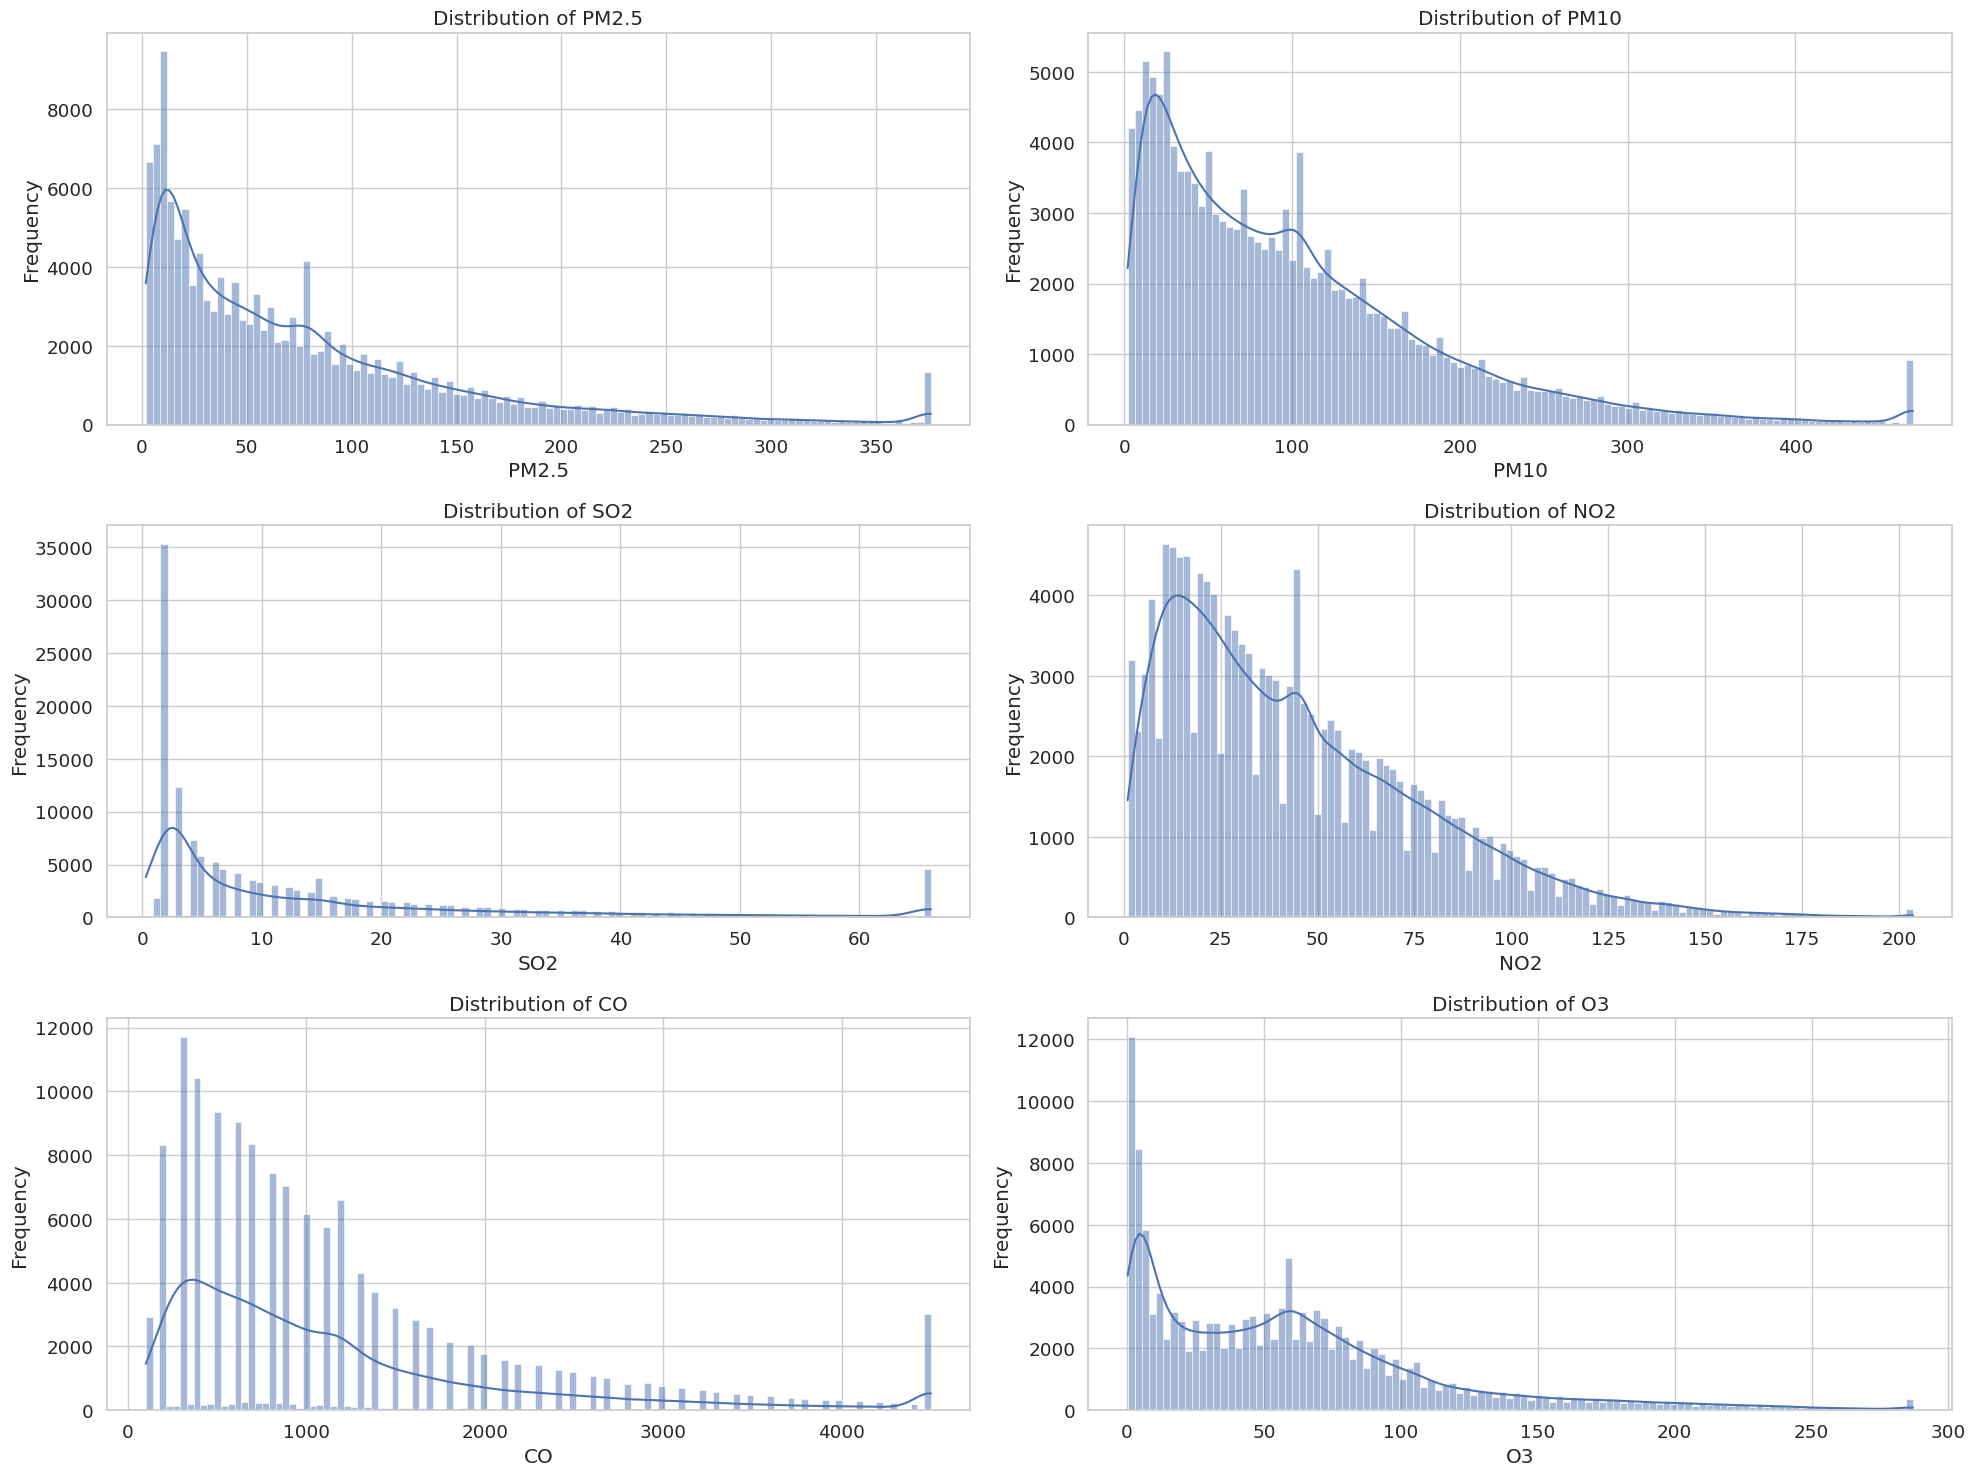

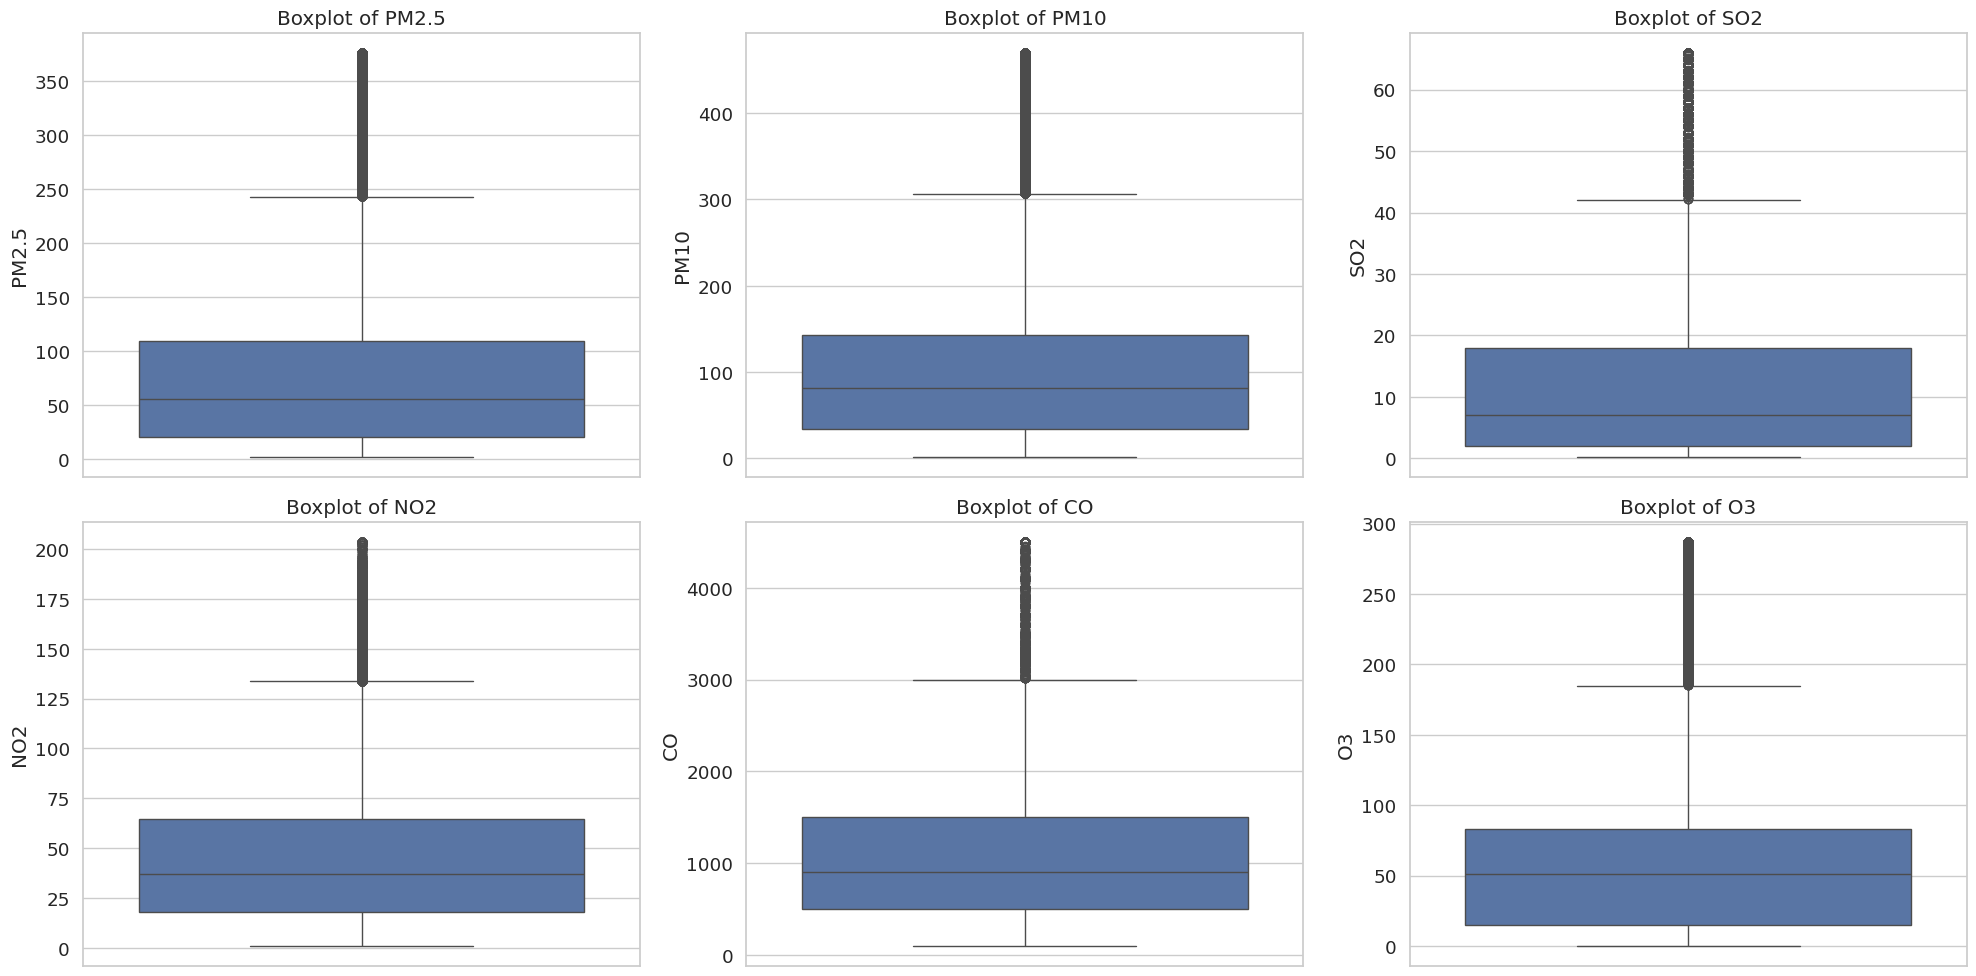

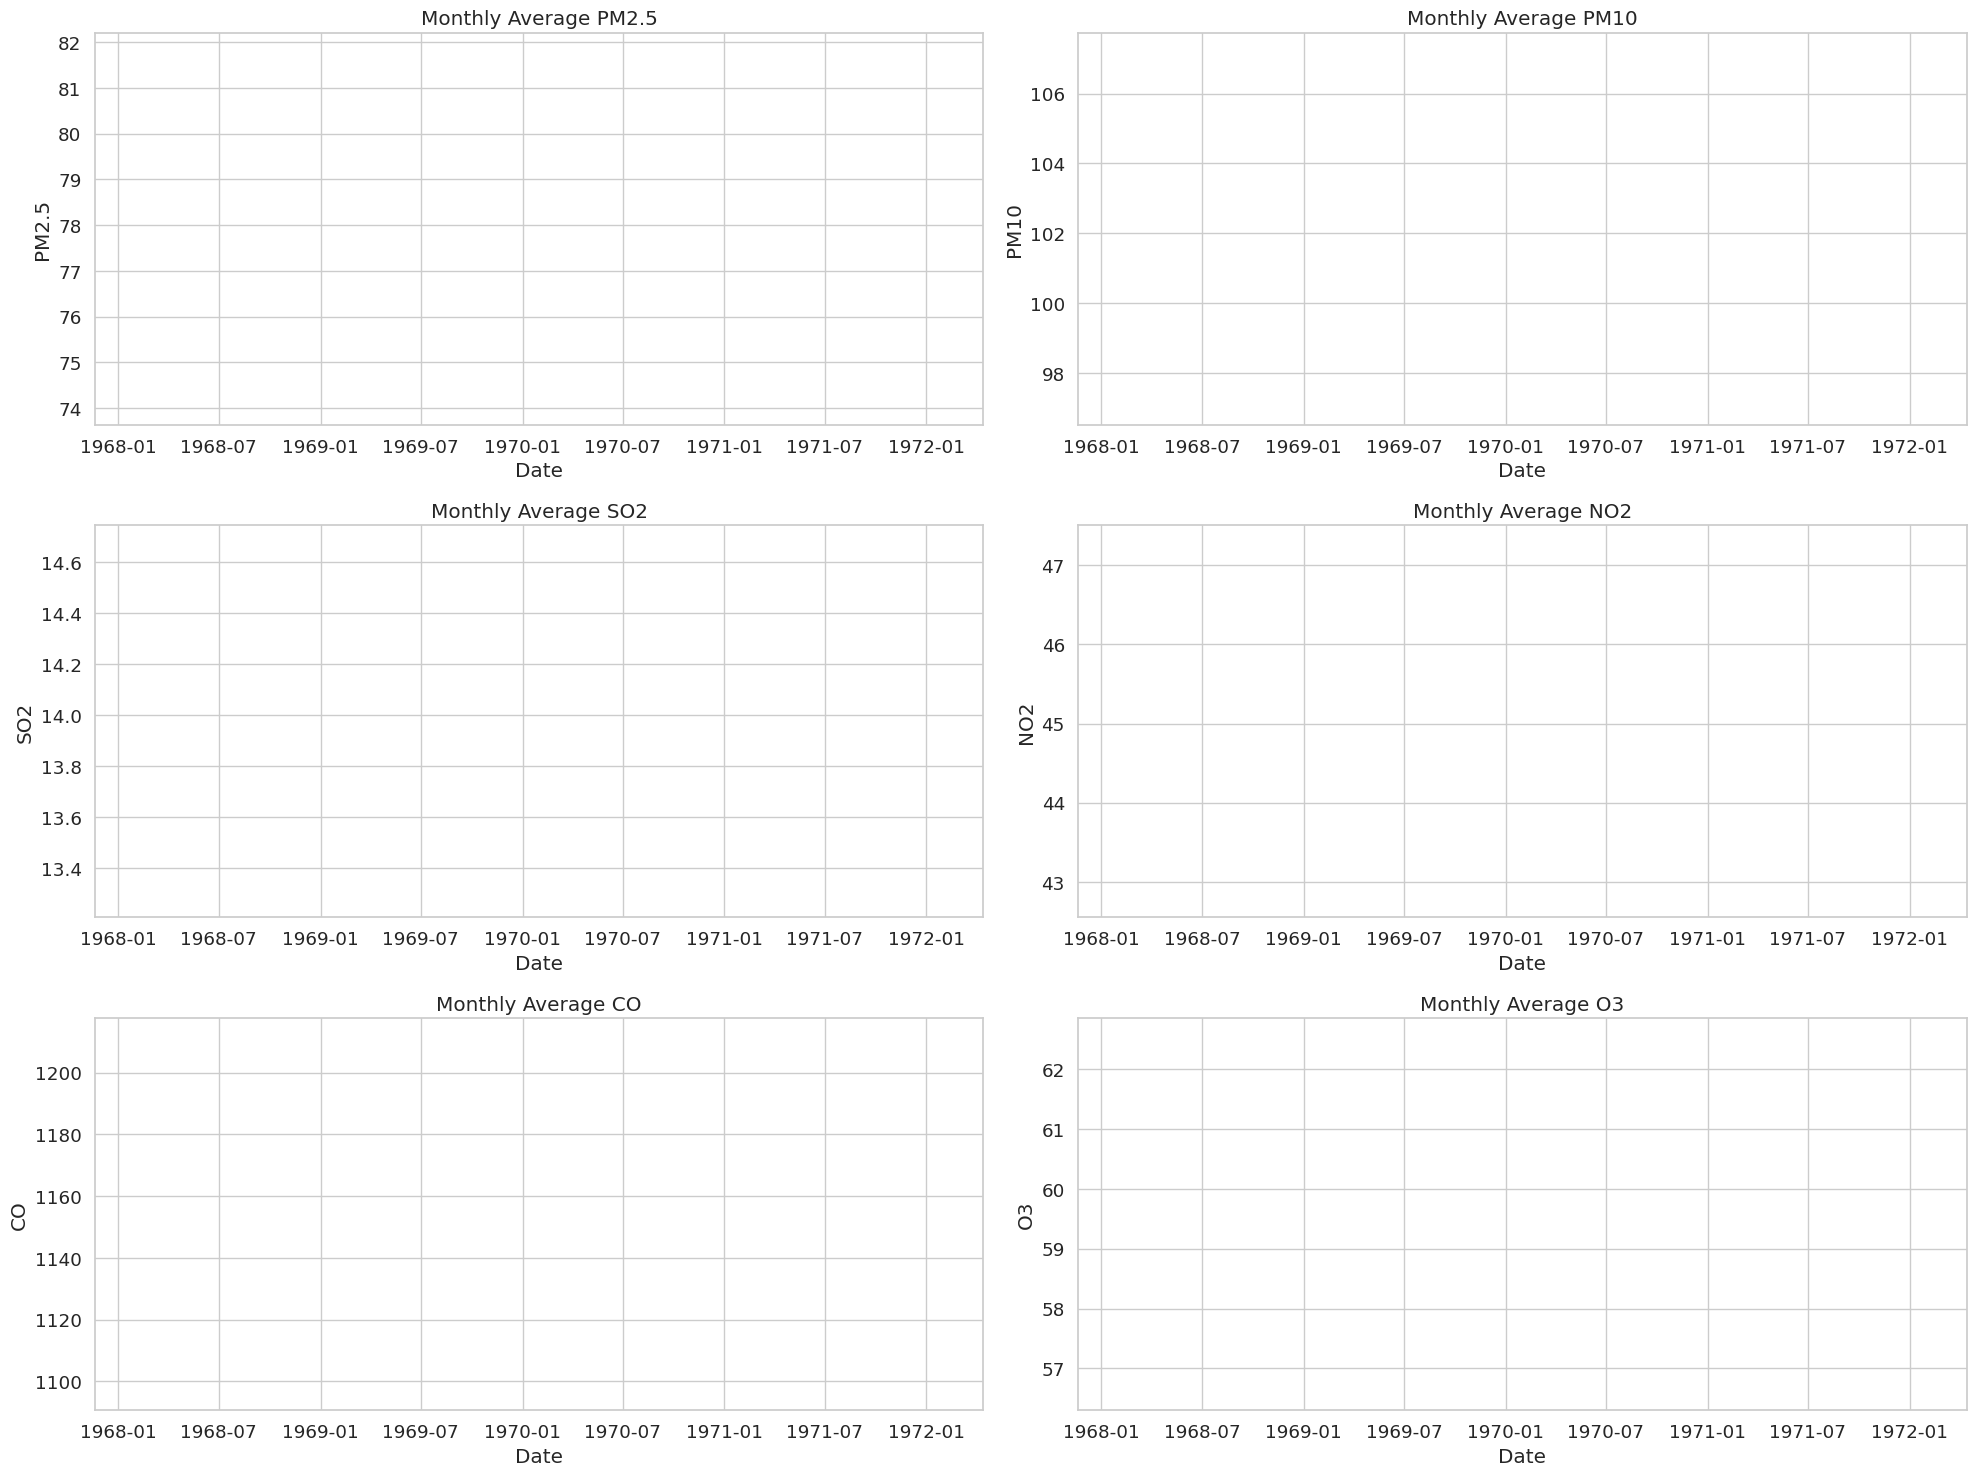

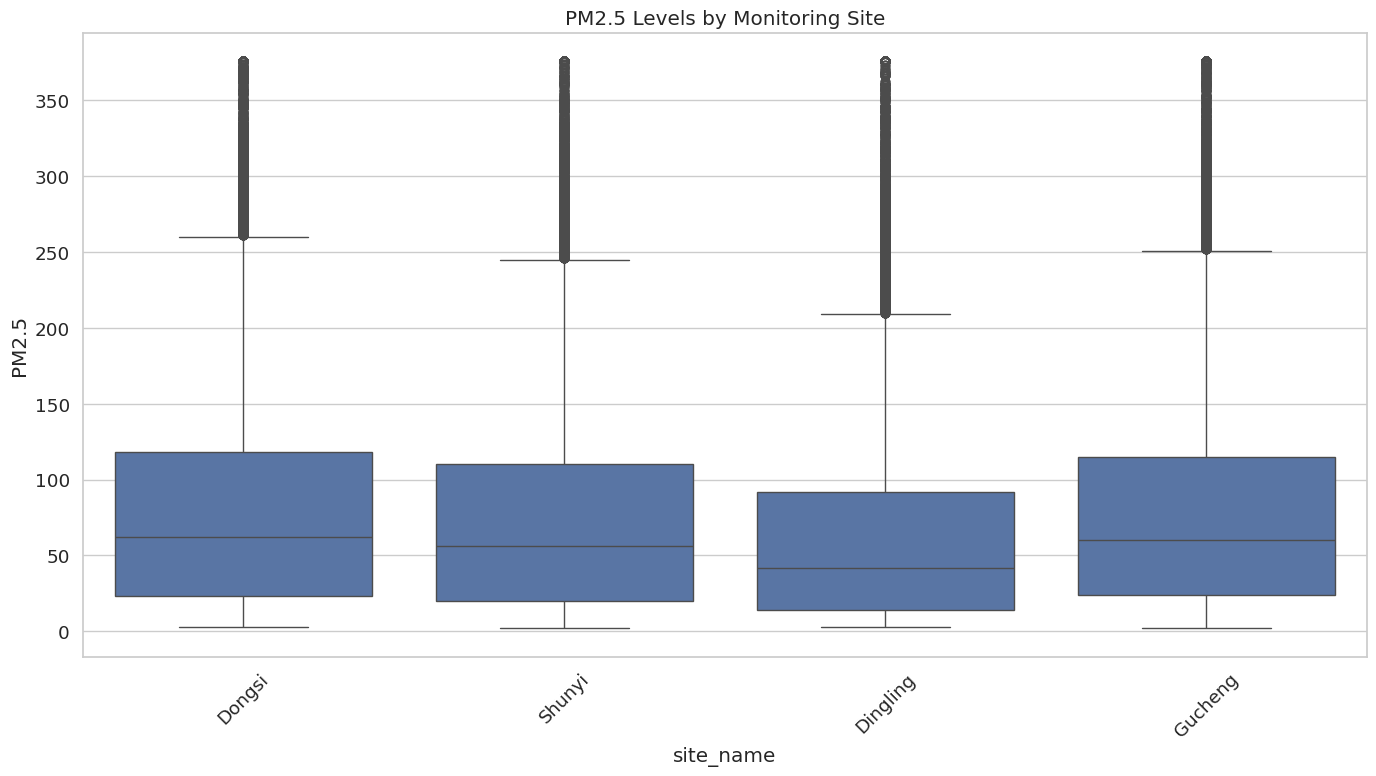


Key Univariate Analysis Findings:
- CO shows the highest variability with a standard deviation of 977.78
- PM2.5, PM10, SO2, NO2, CO, O3 show highly skewed distributions, indicating the presence of extreme values
- urban areas show the highest average PM2.5 levels (84.79)


2. BIVARIATE ANALYSIS
--------------------------------------------------

Correlation Matrix of Pollutants:
          PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.884769  0.509457  0.673384  0.785992 -0.153311
PM10   0.884769  1.000000  0.480904  0.676914  0.700917 -0.118672
SO2    0.509457  0.480904  1.000000  0.538229  0.624294 -0.192849
NO2    0.673384  0.676914  0.538229  1.000000  0.737319 -0.461315
CO     0.785992  0.700917  0.624294  0.737319  1.000000 -0.341890
O3    -0.153311 -0.118672 -0.192849 -0.461315 -0.341890  1.000000


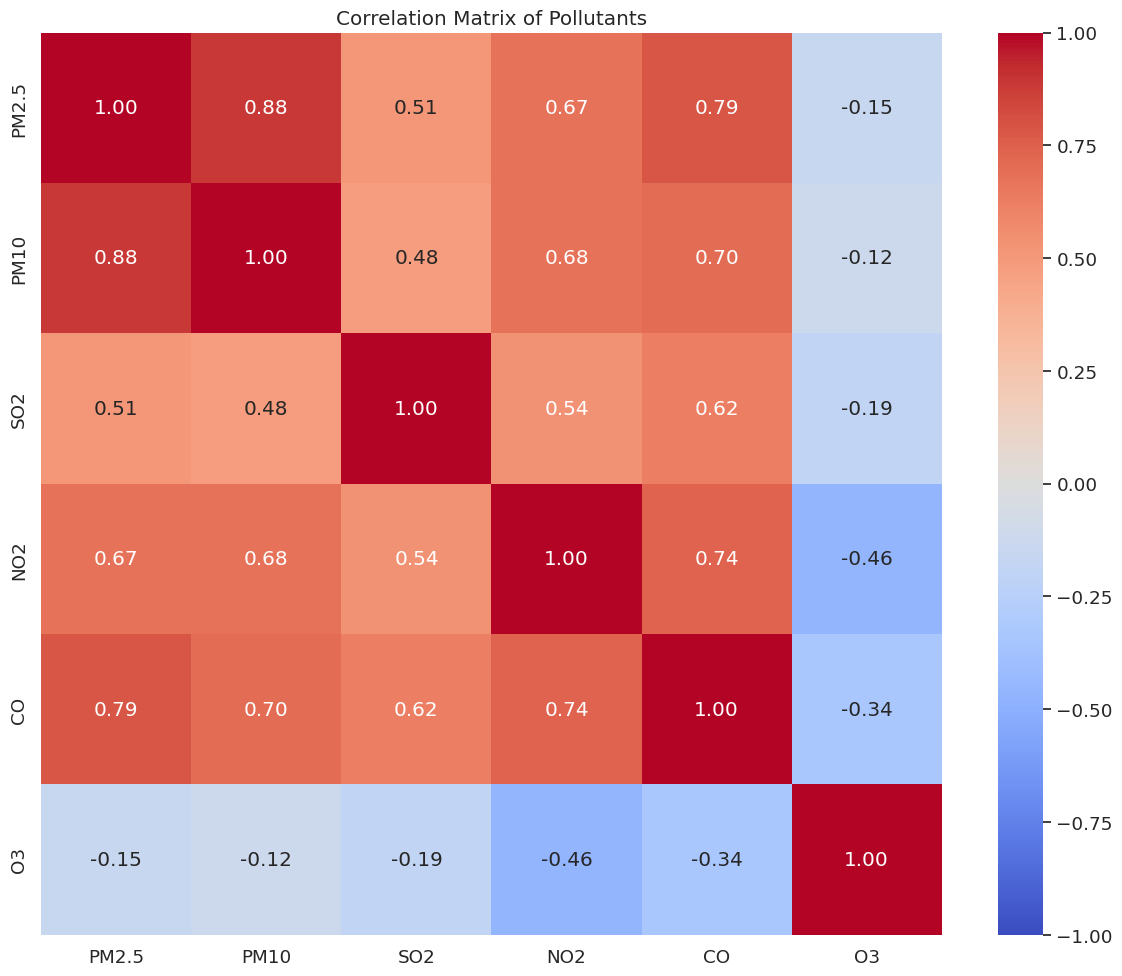

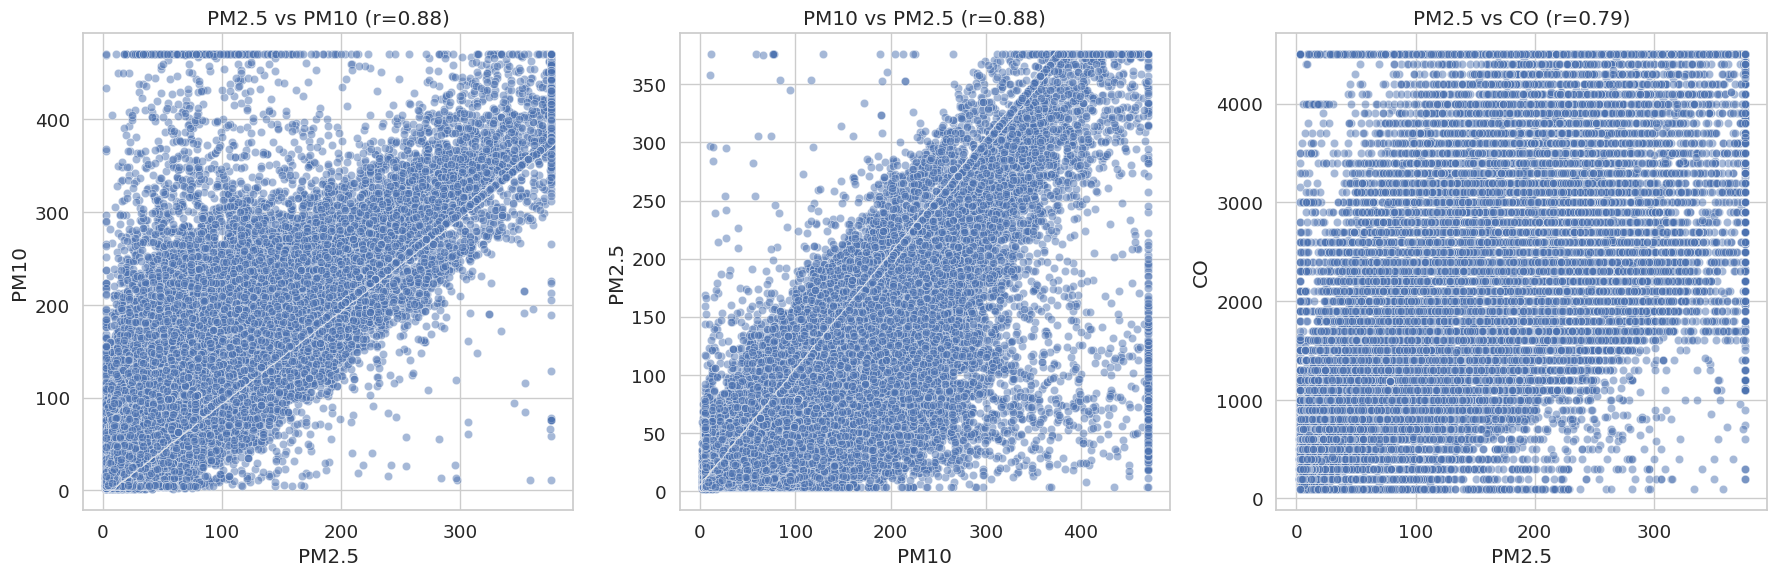

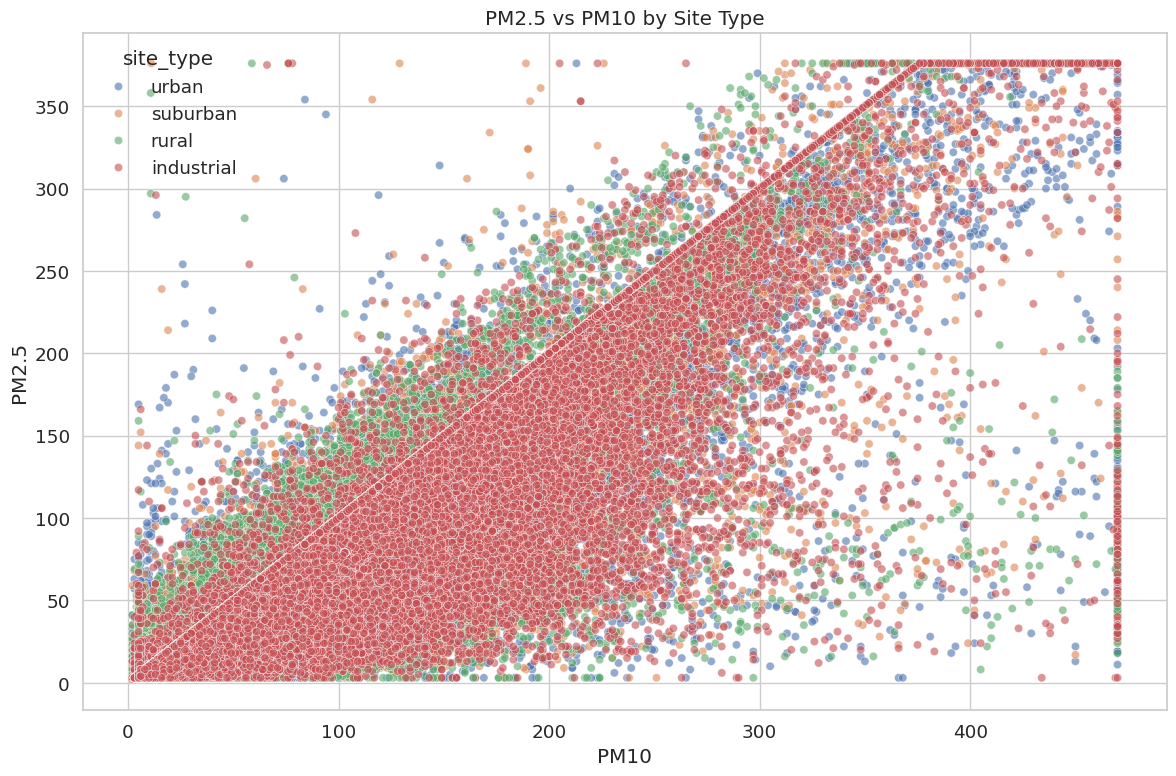


Key Bivariate Analysis Findings:
- PM2.5 and PM10 show the strongest correlation (r=0.88)
- suburban sites have the highest PM2.5/PM10 ratio (0.81), indicating more fine particle pollution


3. MULTIVARIATE ANALYSIS
--------------------------------------------------

Multiple Regression Analysis for PM2.5:
                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 1.840e+05
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:57:58   Log-Likelihood:            -6.9560e+05
No. Observations:              140256   AIC:                         1.391e+06
Df Residuals:                  140252   BIC:                         1.391e+06
Df Model:                           3                      

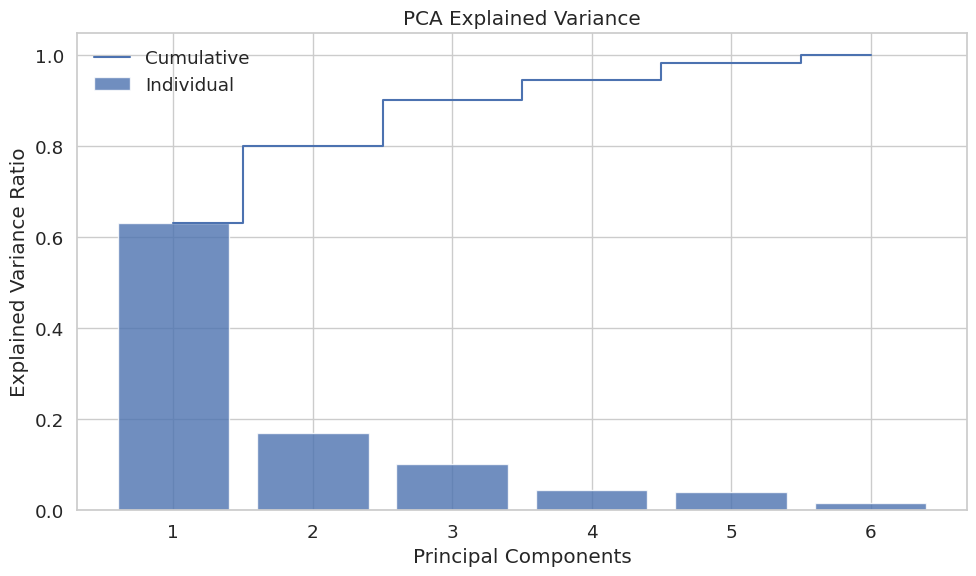

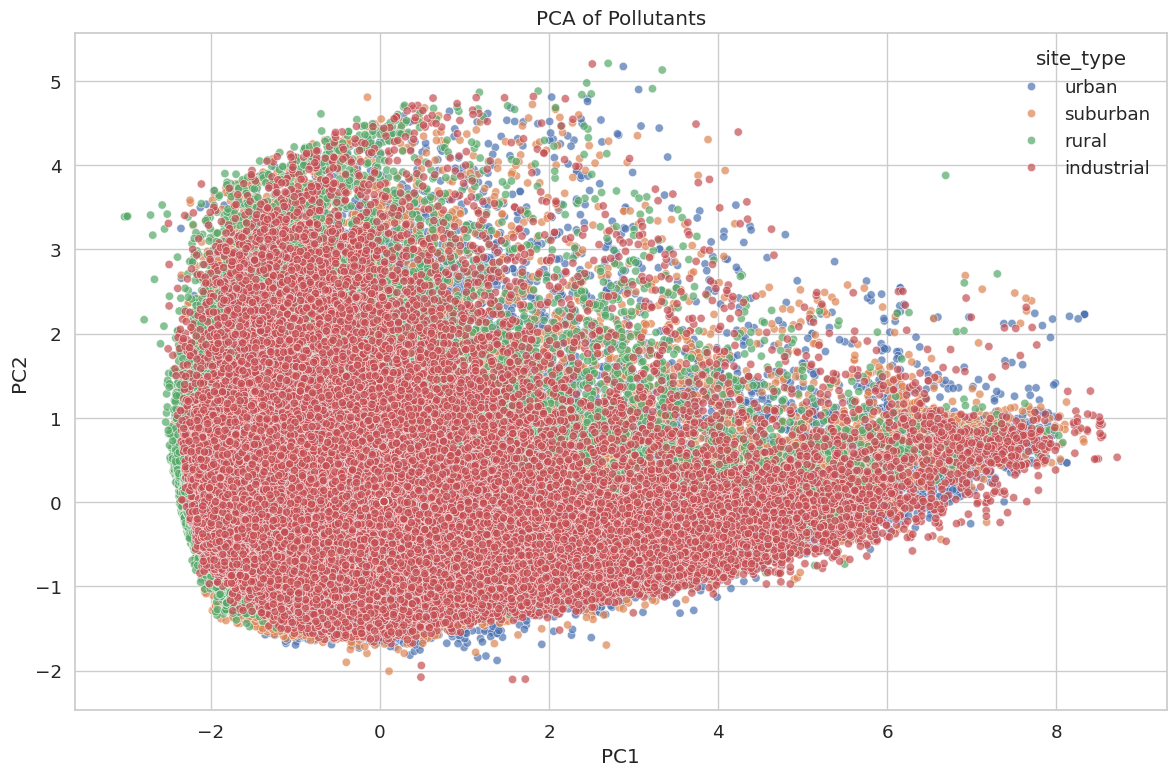

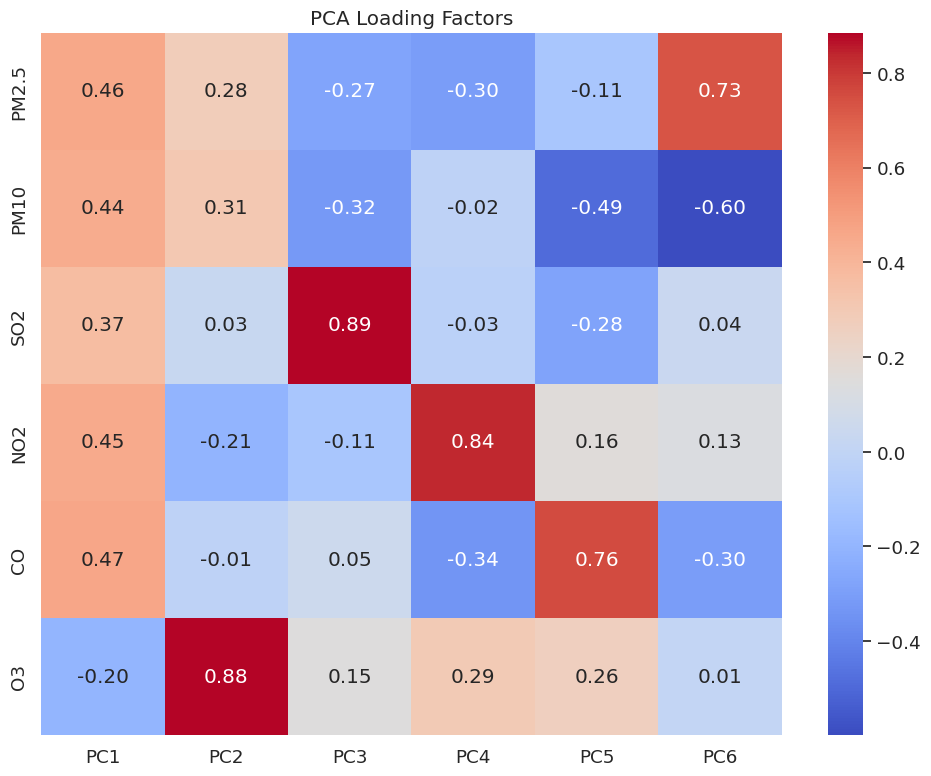

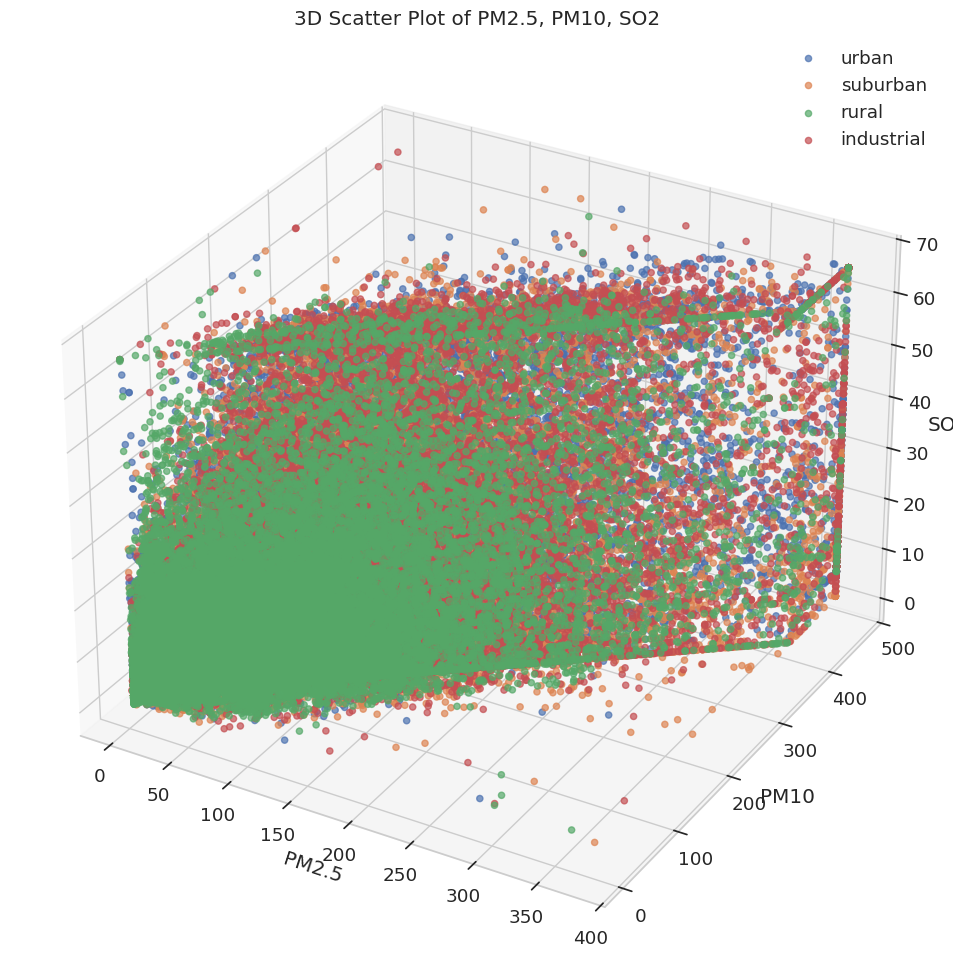


Key Multivariate Analysis Findings:
- PM2.5 levels are significantly predicted by PM10, SO2, NO2
- The regression model explains 79.74% of the variance in PM2.5 levels
- The first 2 principal components explain 80.00% of the total variance in pollutant data
- PC1 is most strongly associated with CO (loading: 0.47)


4. SUMMARY OF KEY FINDINGS
--------------------------------------------------

Based on the statistical analysis and visualizations, the key findings are:
1. The average PM2.5 concentration is 77.92 μg/m³, with a maximum of 376.00 μg/m³.
   86.7% of PM2.5 measurements exceed the WHO annual guideline of 10 μg/m³.
3. Different site types show distinct pollution profiles:
   - urban: 84.79 μg/m³
   - industrial: 82.84 μg/m³
   - suburban: 78.23 μg/m³
   - rural: 65.83 μg/m³
5. Key pollutant relationships:
   - PM2.5 and PM10 are strongly correlated (r=0.88)
   - PM10 and PM2.5 are strongly correlated (r=0.88)
6. Principal Component Analysis reveals that:
   - The primary patt

In [ ]:
from scipy import stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set styling for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Load the cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/Colab_Notebooks/cleaned_air_quality_data.csv'
df = pd.read_csv(cleaned_file_path)

# Convert date column if needed
date_cols = [col for col in df.columns if any(time_kw in col.lower() for time_kw in ['date', 'time', 'year'])]
if date_cols and df[date_cols[0]].dtype != 'datetime64[ns]':
    df[date_cols[0]] = pd.to_datetime(df[date_cols[0]])

# Define pollutant and meteorological columns
pollutant_cols = [col for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'] if col in df.columns]
meteo_cols = [col for col in ['Wspd', 'Rain', 'Temp', 'Dewp', 'Pre', 'RH'] if col in df.columns]

print("="*80)
print("STATISTICAL ANALYSIS AND VISUALIZATION OF AIR QUALITY DATA")
print("="*80)

# ---------- 1. UNIVARIATE ANALYSIS ----------
print("\n1. UNIVARIATE ANALYSIS")
print("-"*50)

# 1.1 Statistical Summary of Pollutants
print("\nStatistical Summary of Pollutants:")
pollutant_stats = df[pollutant_cols].describe().T
# Add skewness and kurtosis
pollutant_stats['skewness'] = df[pollutant_cols].skew()
pollutant_stats['kurtosis'] = df[pollutant_cols].kurtosis()
print(pollutant_stats)

# 1.2 Visualize Distribution of Pollutants
plt.figure(figsize=(20, 15))
for i, col in enumerate(pollutant_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('pollutant_distributions.png')
plt.show()

# 1.3 Boxplots of Pollutants
plt.figure(figsize=(20, 10))
for i, col in enumerate(pollutant_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.savefig('pollutant_boxplots.png')
plt.show()

# 1.4 Time Series of Pollutants (if date data available)
if date_cols:
    date_col = date_cols[0]
    plt.figure(figsize=(20, 15))

    # Group by month for clearer visualization
    monthly_data = df.groupby(pd.Grouper(key=date_col, freq='M'))[pollutant_cols].mean()

    for i, col in enumerate(pollutant_cols):
        plt.subplot(3, 2, i+1)
        plt.plot(monthly_data.index, monthly_data[col])
        plt.title(f'Monthly Average {col}')
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.grid(True)
    plt.tight_layout()
    plt.savefig('pollutant_time_series.png')
    plt.show()

# 1.5 Site Comparison for PM2.5
if 'site_name' in df.columns and 'PM2.5' in df.columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='site_name', y='PM2.5', data=df)
    plt.title('PM2.5 Levels by Monitoring Site')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('pm25_by_site.png')
    plt.show()

# 1.6 Seasonal Variation in Pollutants
if 'season' in df.columns:
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(pollutant_cols):
        plt.subplot(3, 2, i+1)
        sns.boxplot(x='season', y=col, data=df, order=['Winter', 'Spring', 'Summer', 'Fall'])
        plt.title(f'{col} by Season')
        plt.tight_layout()
    plt.savefig('pollutants_by_season.png')
    plt.show()

print("\nKey Univariate Analysis Findings:")
# Identify the most variable pollutant
most_variable = pollutant_stats['std'].idxmax()
print(f"- {most_variable} shows the highest variability with a standard deviation of {pollutant_stats.loc[most_variable, 'std']:.2f}")

# Identify pollutants with skewed distributions
skewed_pollutants = pollutant_stats[pollutant_stats['skewness'].abs() > 1].index.tolist()
if skewed_pollutants:
    print(f"- {', '.join(skewed_pollutants)} show highly skewed distributions, indicating the presence of extreme values")

# Seasonal patterns if available
if 'season' in df.columns:
    for col in pollutant_cols[:2]:  # Limit to two main pollutants for brevity
        seasonal_avg = df.groupby('season')[col].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
        highest_season = seasonal_avg.idxmax()
        print(f"- {col} levels are highest in {highest_season} ({seasonal_avg[highest_season]:.2f})")

# Site type comparison if available
if 'site_type' in df.columns and 'PM2.5' in df.columns:
    type_avg = df.groupby('site_type')['PM2.5'].mean()
    highest_type = type_avg.idxmax()
    print(f"- {highest_type} areas show the highest average PM2.5 levels ({type_avg[highest_type]:.2f})")

# ---------- 2. BIVARIATE ANALYSIS ----------
print("\n\n2. BIVARIATE ANALYSIS")
print("-"*50)

# 2.1 Correlation Matrix of Pollutants
corr_matrix = df[pollutant_cols].corr()
print("\nCorrelation Matrix of Pollutants:")
print(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.savefig('pollutant_correlation.png')
plt.show()

# 2.2 Correlation between Pollutants and Meteorological Factors
if meteo_cols:
    pollutant_meteo_corr = df[pollutant_cols + meteo_cols].corr()
    plt.figure(figsize=(18, 15))
    sns.heatmap(pollutant_meteo_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
    plt.title('Correlation Matrix of Pollutants and Meteorological Factors')
    plt.tight_layout()
    plt.savefig('pollutant_meteo_correlation.png')
    plt.show()

# 2.3 Scatter Plots for Key Relationships
# Identify strongest correlations
strongest_corr = []
for p1 in pollutant_cols:
    for p2 in pollutant_cols:
        if p1 != p2:
            corr_val = abs(corr_matrix.loc[p1, p2])
            strongest_corr.append((p1, p2, corr_val))
strongest_corr.sort(key=lambda x: x[2], reverse=True)

# Plot top 3 strongest correlations
plt.figure(figsize=(18, 6))
for i, (p1, p2, corr) in enumerate(strongest_corr[:3]):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=p1, y=p2, data=df, alpha=0.5)
    plt.title(f'{p1} vs {p2} (r={corr:.2f})')
    plt.tight_layout()
plt.savefig('top_pollutant_correlations.png')
plt.show()

# 2.4 Pollutant-Meteorological Relationships
if meteo_cols and pollutant_cols:
    # Find top correlations between pollutants and meteo factors
    pollutant_meteo_pairs = []
    for p in pollutant_cols:
        for m in meteo_cols:
            corr_val = abs(pollutant_meteo_corr.loc[p, m])
            pollutant_meteo_pairs.append((p, m, corr_val))
    pollutant_meteo_pairs.sort(key=lambda x: x[2], reverse=True)

    # Plot top 3 pollutant-meteo correlations
    plt.figure(figsize=(18, 6))
    for i, (p, m, corr) in enumerate(pollutant_meteo_pairs[:3]):
        plt.subplot(1, 3, i+1)
        sns.scatterplot(x=m, y=p, data=df, alpha=0.5)
        plt.title(f'{p} vs {m} (r={corr:.2f})')
        plt.tight_layout()
    plt.savefig('top_pollutant_meteo_correlations.png')
    plt.show()

# 2.5 PM2.5 vs PM10 Relationship by Site Type
if all(col in df.columns for col in ['PM2.5', 'PM10', 'site_type']):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PM10', y='PM2.5', hue='site_type', data=df, alpha=0.6)
    plt.title('PM2.5 vs PM10 by Site Type')
    plt.tight_layout()
    plt.savefig('pm25_pm10_by_site_type.png')
    plt.show()

print("\nKey Bivariate Analysis Findings:")
# Top pollutant correlations
if strongest_corr:
    print(f"- {strongest_corr[0][0]} and {strongest_corr[0][1]} show the strongest correlation (r={strongest_corr[0][2]:.2f})")

# Key meteorological influences
if meteo_cols and pollutant_meteo_pairs:
    print(f"- {pollutant_meteo_pairs[0][0]} is most strongly influenced by {pollutant_meteo_pairs[0][1]} (r={pollutant_meteo_pairs[0][2]:.2f})")

    # Temperature effect on common pollutants
    if 'Temp' in meteo_cols and 'PM2.5' in pollutant_cols:
        temp_pm25_corr = pollutant_meteo_corr.loc['PM2.5', 'Temp']
        relationship = "increases" if temp_pm25_corr > 0 else "decreases"
        print(f"- PM2.5 concentration {relationship} with temperature (r={temp_pm25_corr:.2f})")

    # Wind speed effect
    if 'Wspd' in meteo_cols and 'PM2.5' in pollutant_cols:
        wind_pm25_corr = pollutant_meteo_corr.loc['PM2.5', 'Wspd']
        print(f"- Wind speed has a correlation of {wind_pm25_corr:.2f} with PM2.5, suggesting {'dispersion effect' if wind_pm25_corr < 0 else 'potential dust resuspension'}")

# PM ratio insights
if 'PM_ratio' in df.columns and 'site_type' in df.columns:
    ratio_by_type = df.groupby('site_type')['PM_ratio'].mean()
    highest_ratio_site = ratio_by_type.idxmax()
    print(f"- {highest_ratio_site} sites have the highest PM2.5/PM10 ratio ({ratio_by_type[highest_ratio_site]:.2f}), indicating more fine particle pollution")

# ---------- 3. MULTIVARIATE ANALYSIS ----------
print("\n\n3. MULTIVARIATE ANALYSIS")
print("-"*50)

# 3.1 Multiple Regression Analysis
if 'PM2.5' in df.columns:
    print("\nMultiple Regression Analysis for PM2.5:")
    predictors = [col for col in ['PM10', 'SO2', 'NO2', 'Temp', 'Wspd', 'Rain'] if col in df.columns]

    if predictors:
        # Prepare data
        y = df['PM2.5'].dropna()
        X = df[predictors].dropna()
        # Only keep rows where both X and y are not null
        joint_idx = X.index.intersection(y.index)
        y = y.loc[joint_idx]
        X = X.loc[joint_idx]

        # Add constant for intercept
        X = sm.add_constant(X)

        # Fit model
        model = sm.OLS(y, X).fit()
        print(model.summary())

        # Identify significant predictors
        pvalues = model.pvalues[1:]  # Skip the constant
        significant_predictors = pvalues[pvalues < 0.05].index.tolist()

        print("\nSignificant predictors of PM2.5:")
        for pred in significant_predictors:
            coef = model.params[pred]
            print(f"- {pred}: coefficient = {coef:.4f} (p < 0.05)")

# 3.2 PCA Analysis on Pollutants
if len(pollutant_cols) >= 3:  # Only perform PCA if we have enough pollutants
    print("\nPrincipal Component Analysis (PCA) on Pollutants:")

    # Prepare data for PCA
    pca_data = df[pollutant_cols].dropna()

    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pca_data)

    # Apply PCA
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)

    # Print explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    print("\nExplained Variance by Principal Components:")
    for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
        print(f"PC{i+1}: {var:.4f} ({cum_var:.4f} cumulative)")

    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.8, label='Individual')
    plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.legend()
    plt.title('PCA Explained Variance')
    plt.tight_layout()
    plt.savefig('pca_explained_variance.png')
    plt.show()

    # Plot first two principal components
    plt.figure(figsize=(12, 8))
    pc_df = pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])

    if 'site_type' in df.columns:
        # Join site_type information to PCA results
        pc_df_with_site = pd.concat([pc_df, df['site_type'].loc[pca_data.index]], axis=1)
        sns.scatterplot(x='PC1', y='PC2', hue='site_type', data=pc_df_with_site, alpha=0.7)
    else:
        sns.scatterplot(x='PC1', y='PC2', data=pc_df, alpha=0.7)

    plt.title('PCA of Pollutants')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('pca_pollutants.png')
    plt.show()

    # Visualize feature loadings
    loadings = pca.components_
    loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=pollutant_cols)

    plt.figure(figsize=(10, 8))
    sns.heatmap(loading_df, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('PCA Loading Factors')
    plt.tight_layout()
    plt.savefig('pca_loadings.png')
    plt.show()

# 3.3 Heatmap of Pollutants by Site and Season
if all(col in df.columns for col in ['site_name', 'season']):
    pivot_data = pd.pivot_table(
        data=df,
        values='PM2.5',  # Change to other pollutants if needed
        index='site_name',
        columns='season',
        aggfunc='mean'
    )

    # Reorder seasons for better visualization
    if all(season in pivot_data.columns for season in ['Winter', 'Spring', 'Summer', 'Fall']):
        pivot_data = pivot_data[['Winter', 'Spring', 'Summer', 'Fall']]

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.1f')
    plt.title('Average PM2.5 by Site and Season')
    plt.tight_layout()
    plt.savefig('pm25_site_season_heatmap.png')
    plt.show()

# 3.4 3D Scatter Plot of Main Pollutants
if len(pollutant_cols) >= 3:
    from mpl_toolkits.mplot3d import Axes3D

    # Select three main pollutants
    main_pollutants = pollutant_cols[:3]

    # Create 3D plot
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot points
    if 'site_type' in df.columns:
        site_types = df['site_type'].unique()
        for site_type in site_types:
            site_data = df[df['site_type'] == site_type]
            ax.scatter(
                site_data[main_pollutants[0]],
                site_data[main_pollutants[1]],
                site_data[main_pollutants[2]],
                alpha=0.7,
                label=site_type
            )
        ax.legend()
    else:
        ax.scatter(
            df[main_pollutants[0]],
            df[main_pollutants[1]],
            df[main_pollutants[2]],
            alpha=0.7
        )

    ax.set_xlabel(main_pollutants[0])
    ax.set_ylabel(main_pollutants[1])
    ax.set_zlabel(main_pollutants[2])
    plt.title(f'3D Scatter Plot of {", ".join(main_pollutants)}')
    plt.tight_layout()
    plt.savefig('3d_pollutants.png')
    plt.show()

print("\nKey Multivariate Analysis Findings:")
# Regression insights
if 'PM2.5' in df.columns and predictors and significant_predictors:
    print(f"- PM2.5 levels are significantly predicted by {', '.join(significant_predictors)}")
    print(f"- The regression model explains {model.rsquared:.2%} of the variance in PM2.5 levels")

# PCA insights
if len(pollutant_cols) >= 3:
    top_components = min(2, len(explained_variance))
    print(f"- The first {top_components} principal components explain {cumulative_variance[top_components-1]:.2%} of the total variance in pollutant data")

    # Interpret PC1 based on loadings
    pc1_dominant = loading_df['PC1'].abs().idxmax()
    pc1_loading = loading_df.loc[pc1_dominant, 'PC1']
    print(f"- PC1 is most strongly associated with {pc1_dominant} (loading: {pc1_loading:.2f})")

# Site-season patterns
if all(col in df.columns for col in ['site_name', 'season']):
    high_season_site = pivot_data.max().idxmax()
    high_site_season = pivot_data.idxmax().loc[high_season_site]
    high_value = pivot_data.loc[high_site_season, high_season_site]
    print(f"- The highest PM2.5 levels occur at {high_site_season} during {high_season_site} season ({high_value:.2f})")

# ---------- 4. SUMMARY OF KEY FINDINGS ----------
print("\n\n4. SUMMARY OF KEY FINDINGS")
print("-"*50)

print("\nBased on the statistical analysis and visualizations, the key findings are:")

# 1. Pollution Levels
if 'PM2.5' in df.columns:
    avg_pm25 = df['PM2.5'].mean()
    max_pm25 = df['PM2.5'].max()
    print(f"1. The average PM2.5 concentration is {avg_pm25:.2f} μg/m³, with a maximum of {max_pm25:.2f} μg/m³.")

    # WHO guideline comparison
    who_guideline = 10  # WHO annual PM2.5 guideline (μg/m³)
    exceed_pct = (df['PM2.5'] > who_guideline).mean() * 100
    print(f"   {exceed_pct:.1f}% of PM2.5 measurements exceed the WHO annual guideline of {who_guideline} μg/m³.")

# 2. Seasonal Patterns
if 'season' in df.columns and 'PM2.5' in df.columns:
    season_avg = df.groupby('season')['PM2.5'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
    highest_season = season_avg.idxmax()
    lowest_season = season_avg.idxmin()
    print(f"2. Air pollution shows strong seasonal patterns, with highest levels in {highest_season} and lowest in {lowest_season}.")
    print(f"   The difference between {highest_season} and {lowest_season} PM2.5 levels is {season_avg[highest_season] - season_avg[lowest_season]:.2f} μg/m³.")

# 3. Site Type Differences
if 'site_type' in df.columns and 'PM2.5' in df.columns:
    site_type_avg = df.groupby('site_type')['PM2.5'].mean()
    print(f"3. Different site types show distinct pollution profiles:")
    for site_type, avg in site_type_avg.sort_values(ascending=False).items():
        print(f"   - {site_type}: {avg:.2f} μg/m³")

# 4. Meteorological Influences
if meteo_cols and pollutant_cols and pollutant_meteo_pairs:
    print(f"4. Meteorological factors significantly influence pollution levels:")
    for p, m, corr in pollutant_meteo_pairs[:2]:  # Top 2 relationships
        direction = "positive" if corr > 0 else "negative"
        print(f"   - {p} shows a {direction} relationship with {m} (r={corr:.2f})")

# 5. Pollutant Interrelationships
if strongest_corr:
    print(f"5. Key pollutant relationships:")
    for p1, p2, corr in strongest_corr[:2]:  # Top 2 relationships
        print(f"   - {p1} and {p2} are strongly correlated (r={corr:.2f})")

# 6. Principal Components
if len(pollutant_cols) >= 3 and 'PC1' in loading_df.columns:
    print("6. Principal Component Analysis reveals that:")
    pc1_pollutants = []
    for pollutant in pollutant_cols:
        if abs(loading_df.loc[pollutant, 'PC1']) > 0.3:  # Threshold for significant loading
            pc1_pollutants.append(pollutant)

    if pc1_pollutants:
        print(f"   - The primary pattern of variation (PC1) is driven by {', '.join(pc1_pollutants)}")
        if 'site_type' in df.columns:
            print(f"   - This suggests different site types have distinct pollution profiles")

# **Task 3:**  
# **Model Building:**
After performing Task 1 and Task 2 identify and implement the best practices to build a suitable machine-learning model (you may consider feature scaling, encoding techniques, variables selection, and parameter optimizations, etc.).

MACHINE LEARNING MODEL FOR AIR QUALITY PREDICTION

1. DEFINING TARGET VARIABLE AND FEATURES
--------------------------------------------------
Target Variable: PM2.5
Number of features: 19
Features: ['No', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'site_type', 'site_name', 'PM_ratio']

Numeric features (15): ['No', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM_ratio']
Categorical features (4): ['wd', 'station', 'site_type', 'site_name']

2. SPLITTING DATA INTO TRAIN AND TEST SETS
--------------------------------------------------
Rows after dropping missing target values: 140256
Training set size: 112204 samples
Test set size: 28052 samples

3. SETTING UP PREPROCESSING PIPELINE
--------------------------------------------------
Preprocessing pipeline created with:
- Numeric features: Median imputation and StandardScaler
- Categorical features: Most frequent i

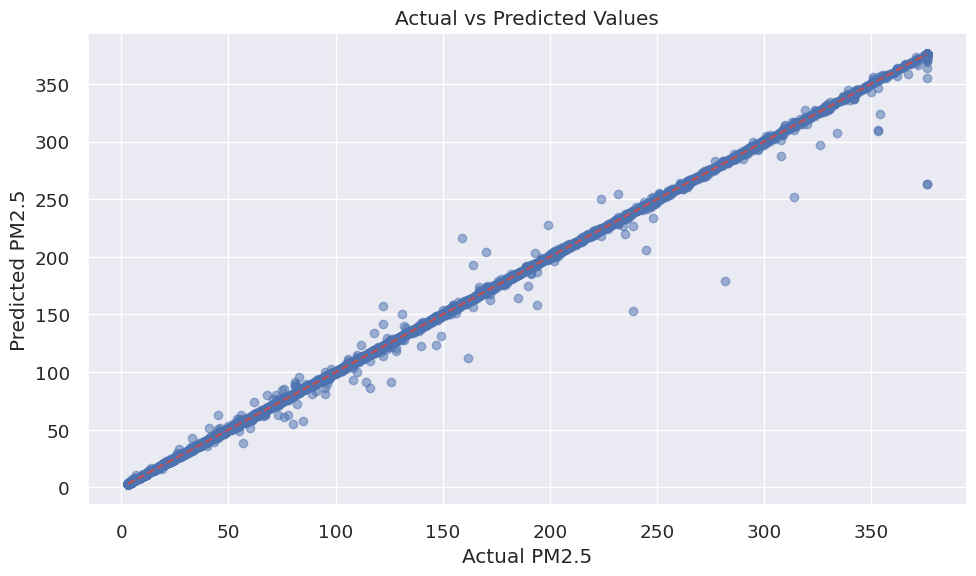

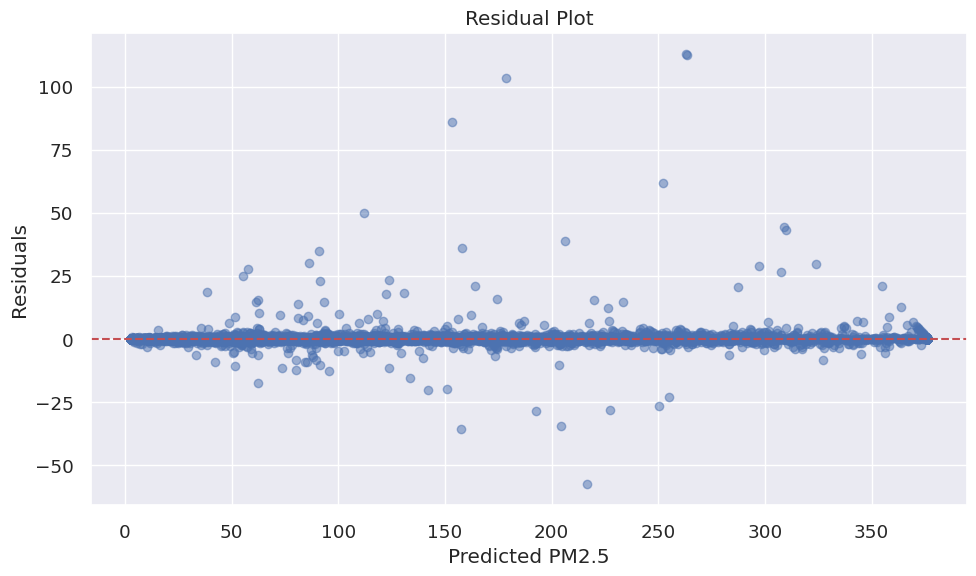

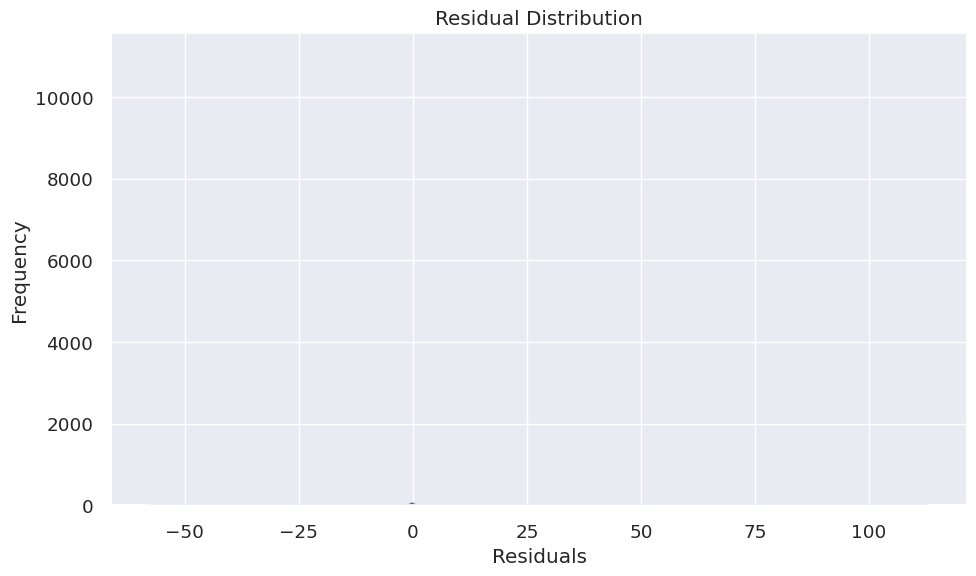


8. FEATURE IMPORTANCE
--------------------------------------------------


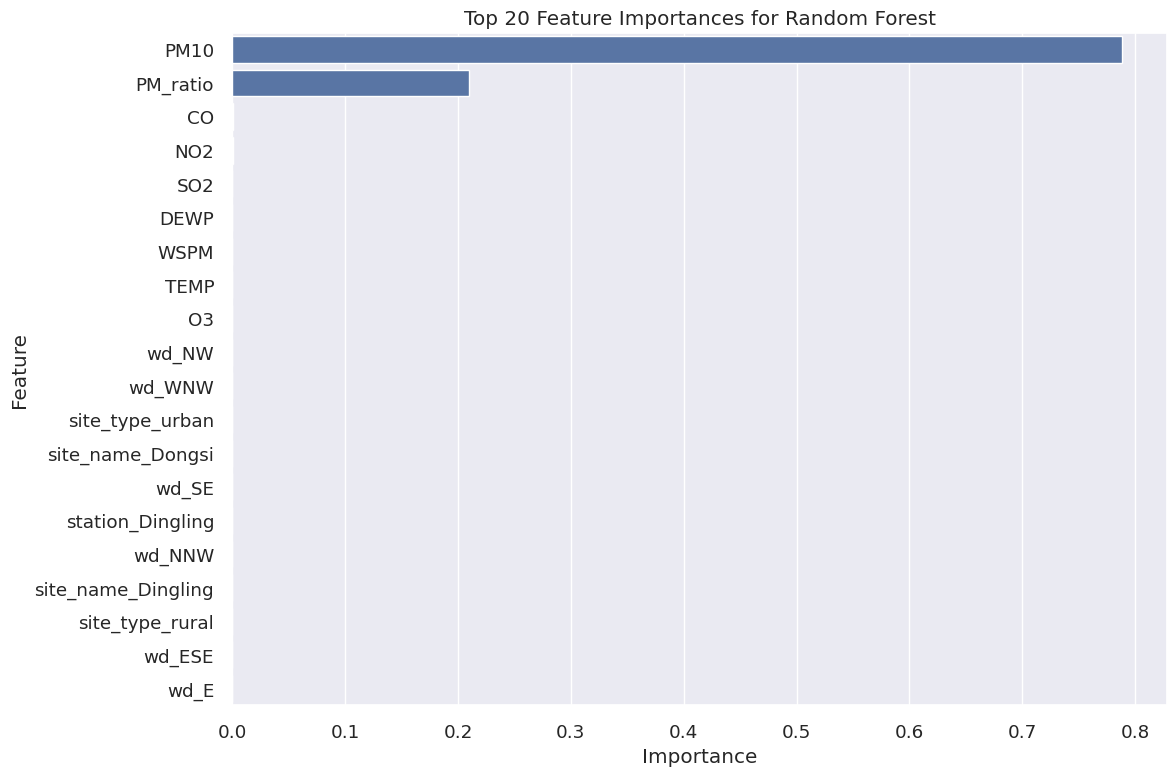

Top 10 Most Important Features:
PM10: 0.7886
PM_ratio: 0.2099
CO: 0.0009
NO2: 0.0003
SO2: 0.0001
DEWP: 0.0001
WSPM: 0.0001
TEMP: 0.0001
O3: 0.0000
wd_NW: 0.0000

9. MODEL INSIGHTS WITH SHAP VALUES
--------------------------------------------------


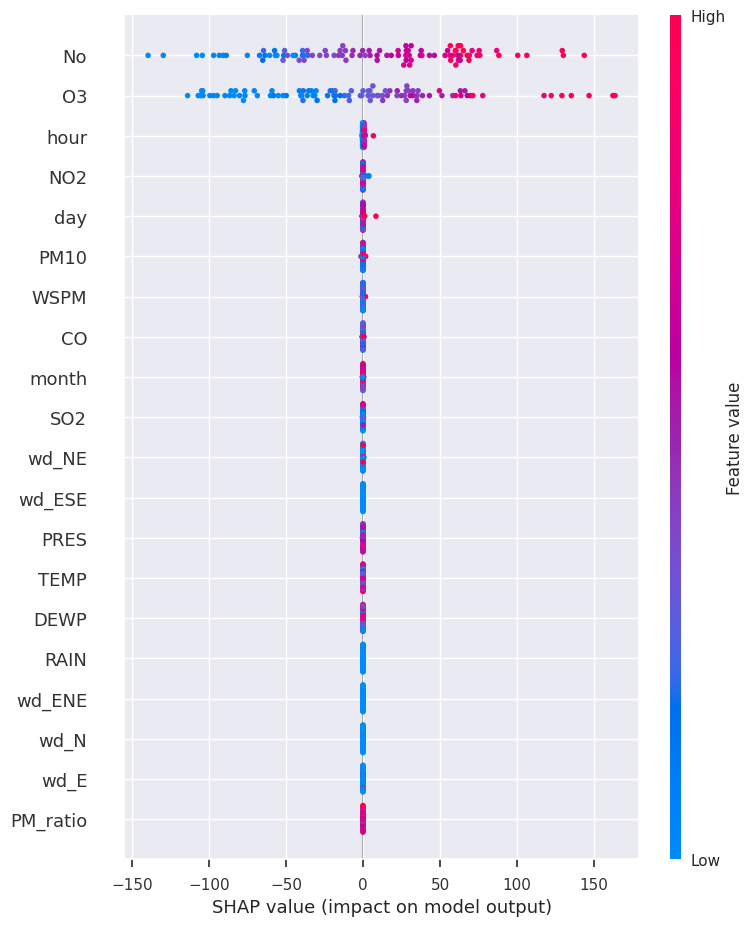

<Figure size 800x550 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

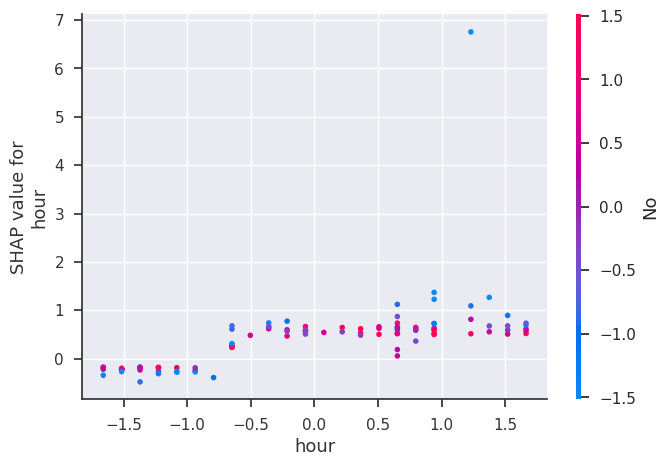

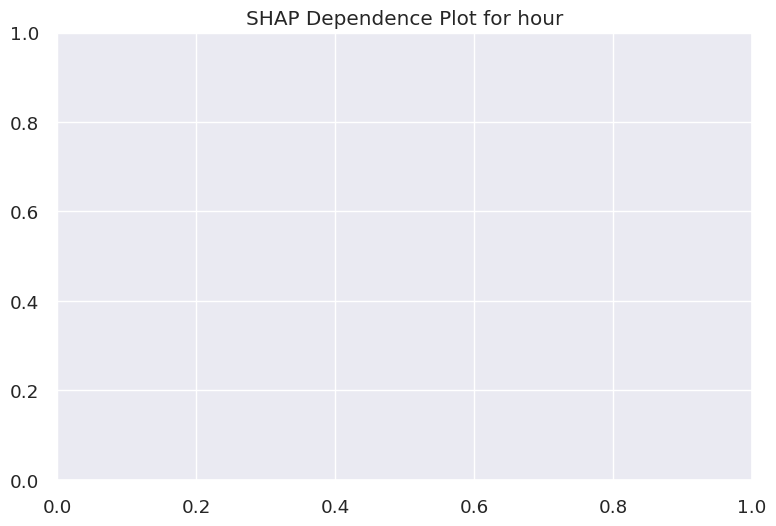

<Figure size 1000x600 with 0 Axes>

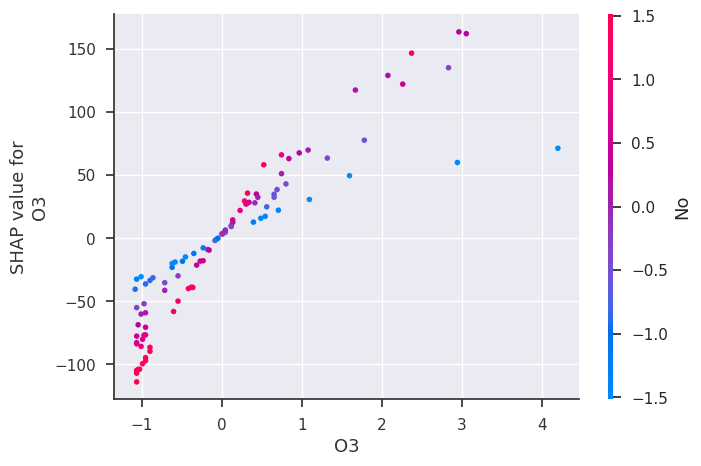

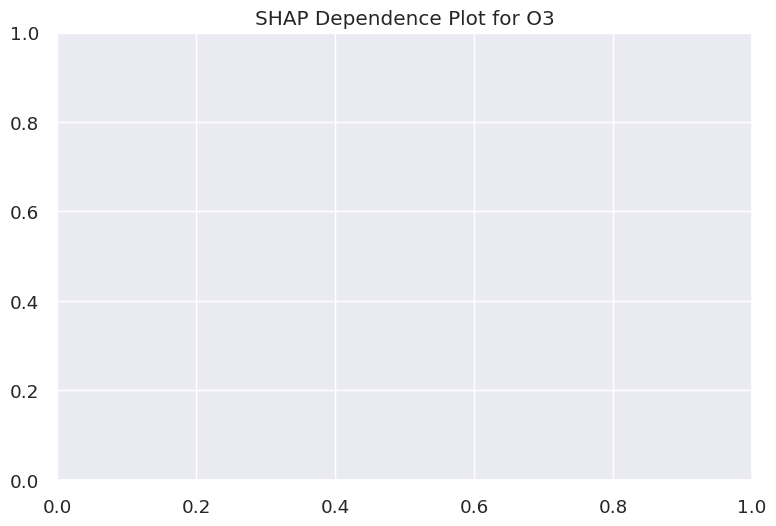

<Figure size 1000x600 with 0 Axes>

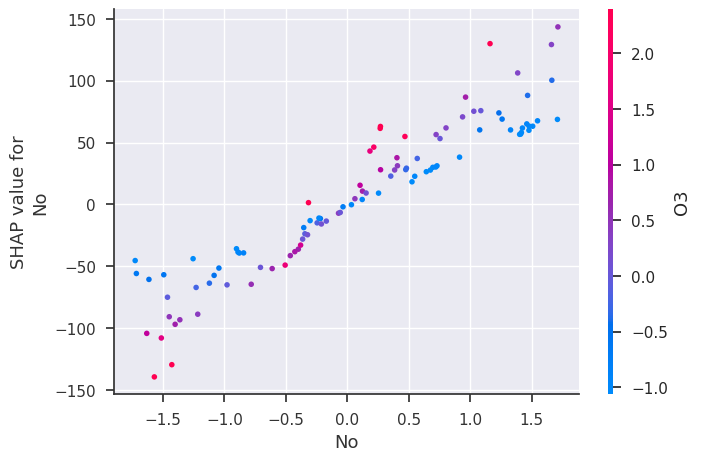

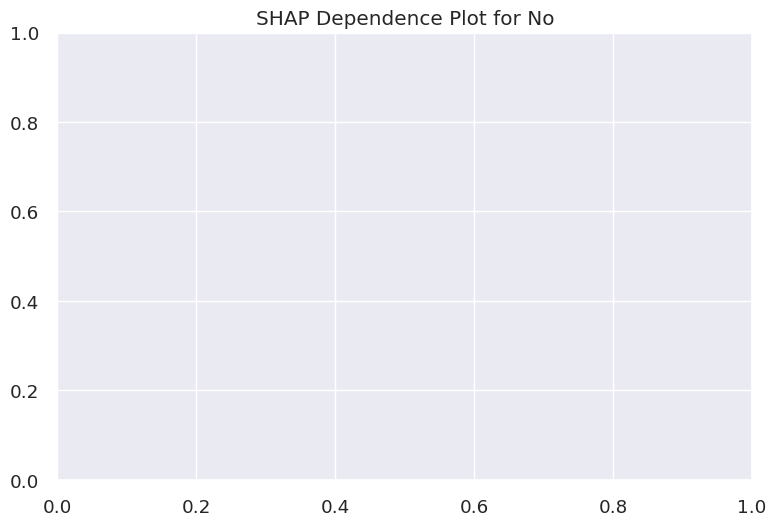

SHAP analysis completed. See the plots for detailed feature impact visualization.

10. SAVING THE MODEL
--------------------------------------------------
Model saved to: /content/drive/MyDrive/Colab_Notebooks/air_quality_model.pkl
Inference model saved to: /content/drive/MyDrive/Colab_Notebooks/air_quality_inference_model.pkl

11. MODEL SUMMARY AND CONCLUSIONS
--------------------------------------------------

Final Model: Random Forest with optimized hyperparameters
Model Performance: RMSE = 1.74, MAE = 0.20, R² = 0.9995

Key Insights:
1. The model shows excellent performance with R² = 0.9995, explaining 99.9% of the variance in PM2.5.
2. The most important predictor of PM2.5 is PM10.
3. Top 3 predictors: PM10, PM_ratio, CO

Recommendations:
- The model is performing well and can be used for reliable predictions.
- Focus on the top predictors identified for monitoring and policy decisions.
- Consider implementing the model in a real-time prediction system.

Potential Applications:
-

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import xgboost as XGBRegressor
import shap


# Set styling for better visualizations
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

# Load the cleaned dataset
cleaned_file_path = '/content/drive/MyDrive/Colab_Notebooks/cleaned_air_quality_data.csv'
df = pd.read_csv(cleaned_file_path)

print("="*80)
print("MACHINE LEARNING MODEL FOR AIR QUALITY PREDICTION")
print("="*80)

# ---------- 1. DEFINE TARGET AND FEATURES ----------
print("\n1. DEFINING TARGET VARIABLE AND FEATURES")
print("-"*50)

# Let's predict PM2.5 as it's often the most health-relevant pollutant
target_variable = 'PM2.5'
print(f"Target Variable: {target_variable}")

# Define features to exclude
exclude_columns = [target_variable, 'PM25_AQI', 'AQI_Category']  # Derived from PM2.5
date_cols = [col for col in df.columns if any(time_kw in col.lower() for time_kw in ['date', 'time', 'year'])]
exclude_columns.extend(date_cols)  # Exclude date columns

# Get all feature columns
feature_columns = [col for col in df.columns if col not in exclude_columns]
print(f"Number of features: {len(feature_columns)}")
print(f"Features: {feature_columns}")

# Separate numeric and categorical features
numeric_features = df[feature_columns].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df[feature_columns].select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumeric features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

# ---------- 2. DATA SPLITTING ----------
print("\n2. SPLITTING DATA INTO TRAIN AND TEST SETS")
print("-"*50)

# Drop rows with missing target values
df_model = df.dropna(subset=[target_variable])
print(f"Rows after dropping missing target values: {len(df_model)}")

# Split features and target
X = df_model[feature_columns]
y = df_model[target_variable]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# ---------- 3. FEATURE PREPROCESSING PIPELINE ----------
print("\n3. SETTING UP PREPROCESSING PIPELINE")
print("-"*50)

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipeline created with:")
print(f"- Numeric features: Median imputation and StandardScaler")
print(f"- Categorical features: Most frequent imputation and OneHotEncoder")

# ---------- 4. FEATURE SELECTION ----------
print("\n4. FEATURE SELECTION")
print("-"*50)

# Apply preprocessing to get transformed features for selection
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Select top 20 features using univariate selection (f_regression)
if X_train_preprocessed.shape[1] > 20:  # Only if we have more than 20 features
    try:
        # SelectKBest with f_regression
        selector = SelectKBest(f_regression, k=min(20, X_train_preprocessed.shape[1]))
        X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)

        # Get selected feature indices
        selected_indices = selector.get_support(indices=True)
        print(f"Selected {len(selected_indices)} top features based on f_regression")

        # Include this selector in the pipeline
        feature_selector = selector
    except:
        print("Error in feature selection. Using all features.")
        feature_selector = 'passthrough'
else:
    print("Using all features as the number is already manageable.")
    feature_selector = 'passthrough'

# ---------- 5. MODEL SELECTION ----------
print("\n5. MODEL SELECTION")
print("-"*50)

# Define models to evaluate
models = {
    'Linear Regression (Ridge)': Ridge(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor.XGBRegressor(random_state=42),
    'SVR': SVR()
}

# Create pipelines for each model
pipelines = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('selector', feature_selector),
        ('model', model)
    ])
    pipelines[name] = pipeline

# Evaluate each model with cross-validation
cv_results = {}
print("\nModel Cross-Validation Results (RMSE):")
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    cv_results[name] = -cv_scores.mean()  # Convert to positive RMSE
    print(f"{name}: {cv_results[name]:.2f}")

# Select the best model
best_model_name = min(cv_results, key=cv_results.get)
best_model = pipelines[best_model_name]
print(f"\nBest model based on cross-validation: {best_model_name} (RMSE: {cv_results[best_model_name]:.2f})")

# ---------- 6. HYPERPARAMETER TUNING ----------
print("\n6. HYPERPARAMETER TUNING")
print("-"*50)

# Define hyperparameter grids for different models
param_grids = {
    'Linear Regression (Ridge)': {
        'model__alpha': [0.01, 0.1, 1.0, 10.0]
    },
    'Elastic Net': {
        'model__alpha': [0.01, 0.1, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__gamma': ['scale', 'auto', 0.1, 0.01]
    }
}

# Tune hyperparameters for the best model
print(f"Tuning hyperparameters for {best_model_name}...")
grid_search = GridSearchCV(
    best_model,
    param_grids[best_model_name],
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert to positive RMSE
print(f"Best parameters: {best_params}")
print(f"Best cross-validation RMSE: {best_score:.2f}")

# Update the best model with tuned parameters
tuned_model = grid_search.best_estimator_

# ---------- 7. MODEL EVALUATION ----------
print("\n7. MODEL EVALUATION")
print("-"*50)

# Train the tuned model on the full training set
tuned_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = tuned_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Performance Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel(f'Actual {target_variable}')
plt.ylabel(f'Predicted {target_variable}')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel(f'Predicted {target_variable}')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('residuals.png')
plt.show()

# Residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.tight_layout()
plt.savefig('residual_distribution.png')
plt.show()

# ---------- 8. FEATURE IMPORTANCE ----------
print("\n8. FEATURE IMPORTANCE")
print("-"*50)

# Get feature names after preprocessing
preprocessor_output_feature_names = []

# For numeric features
preprocessor_output_feature_names.extend(numeric_features)

# For categorical features (expand to account for one-hot encoding)
categorical_pipeline = preprocessor.transformers_[1][1]
try:
    encoder = categorical_pipeline.named_steps['onehot']
    encoder.fit(X_train[categorical_features])
    encoded_feature_names = []
    for i, feature in enumerate(categorical_features):
        encoded_feature_names.extend([f"{feature}_{category}" for category in encoder.categories_[i]])
    preprocessor_output_feature_names.extend(encoded_feature_names)
except:
    # If we can't get encoded feature names, just use the original names
    preprocessor_output_feature_names.extend(categorical_features)

# Try to get feature importance based on the model type
if hasattr(tuned_model.named_steps['model'], 'feature_importances_'):
    # Tree-based models have feature_importances_ attribute
    feature_importances = tuned_model.named_steps['model'].feature_importances_

    # If we applied feature selection, adjust the feature names
    if feature_selector != 'passthrough' and hasattr(feature_selector, 'get_support'):
        selected_mask = feature_selector.get_support()
        filtered_feature_names = [name for i, name in enumerate(preprocessor_output_feature_names) if selected_mask[i]]
    else:
        filtered_feature_names = preprocessor_output_feature_names

    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': filtered_feature_names[:len(feature_importances)],
        'Importance': feature_importances
    })
    importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Top 20 Feature Importances for {best_model_name}')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

    print("Top 10 Most Important Features:")
    for i, row in importance_df.head(10).iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")
else:
    # For models without built-in feature importance, use permutation importance
    try:
        print("Computing permutation importance (this might take a while)...")
        perm_importance = permutation_importance(tuned_model, X_test, y_test, n_repeats=10, random_state=42)

        # Create DataFrame for visualization
        perm_importance_df = pd.DataFrame({
            'Feature': feature_columns,
            'Importance': perm_importance.importances_mean
        })
        perm_importance_df = perm_importance_df.sort_values('Importance', ascending=False).head(20)

        # Plot permutation importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
        plt.title(f'Top 20 Permutation Feature Importances for {best_model_name}')
        plt.tight_layout()
        plt.savefig('permutation_importance.png')
        plt.show()

        print("Top 10 Most Important Features (Permutation Importance):")
        for i, row in perm_importance_df.head(10).iterrows():
            print(f"{row['Feature']}: {row['Importance']:.4f}")
    except:
        print("Could not compute feature importance for this model.")

# ---------- 9. MODEL INSIGHTS WITH SHAP VALUES ----------
print("\n9. MODEL INSIGHTS WITH SHAP VALUES")
print("-"*50)

try:
    # Create a small sample for SHAP analysis (SHAP can be computationally intensive)
    X_sample = X_test.sample(min(100, len(X_test)), random_state=42)

    # Create a SHAP explainer
    if hasattr(tuned_model.named_steps['model'], 'predict_proba'):
        explainer = shap.Explainer(tuned_model.named_steps['model'], preprocessor.transform(X_train))
        shap_values = explainer(preprocessor.transform(X_sample))
    else:
        explainer = shap.Explainer(tuned_model.named_steps['model'])
        shap_values = explainer(preprocessor.transform(X_sample))

    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, preprocessor.transform(X_sample), feature_names=preprocessor_output_feature_names)
    plt.savefig('shap_summary.png')
    plt.show()

    # Dependence plots for top features
    if hasattr(shap_values, 'values'):
        # For newer SHAP versions
        feature_importance = np.abs(shap_values.values).mean(0)
    else:
        # For older SHAP versions
        feature_importance = np.abs(shap_values).mean(0)

    top_indices = np.argsort(feature_importance)[-3:]  # Top 3 features

    for i in top_indices:
        if i < len(preprocessor_output_feature_names):
            plt.figure(figsize=(10, 6))
            shap.dependence_plot(i, shap_values.values, preprocessor.transform(X_sample),
                                feature_names=preprocessor_output_feature_names)
            plt.title(f'SHAP Dependence Plot for {preprocessor_output_feature_names[i]}')
            plt.tight_layout()
            plt.savefig(f'shap_dependence_{i}.png')
            plt.show()

    print("SHAP analysis completed. See the plots for detailed feature impact visualization.")
except Exception as e:
    print(f"SHAP analysis could not be completed: {e}")

# ---------- 10. SAVE THE MODEL ----------
print("\n10. SAVING THE MODEL")
print("-"*50)

import joblib

# Save the model
model_path = '/content/drive/MyDrive/Colab_Notebooks/air_quality_model.pkl'
joblib.dump(tuned_model, model_path)
print(f"Model saved to: {model_path}")

# Simpler version of the model for inference
# This is just the fitted model without the pipeline steps
# We're assuming the pipeline preprocessing steps will be done separately when using the model
inference_model_path = '/content/drive/MyDrive/Colab_Notebooks/air_quality_inference_model.pkl'
joblib.dump(tuned_model.named_steps['model'], inference_model_path)
print(f"Inference model saved to: {inference_model_path}")

# ---------- 11. MODEL SUMMARY AND CONCLUSIONS ----------
print("\n11. MODEL SUMMARY AND CONCLUSIONS")
print("-"*50)

print(f"\nFinal Model: {best_model_name} with optimized hyperparameters")
print(f"Model Performance: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.4f}")

print("\nKey Insights:")
# Performance assessment
if r2 < 0.3:
    performance = "poor"
elif r2 < 0.5:
    performance = "moderate"
elif r2 < 0.7:
    performance = "good"
else:
    performance = "excellent"
print(f"1. The model shows {performance} performance with R² = {r2:.4f}, explaining {r2*100:.1f}% of the variance in {target_variable}.")

# Top predictors
if 'importance_df' in locals():
    top_predictor = importance_df.iloc[0]['Feature']
    print(f"2. The most important predictor of {target_variable} is {top_predictor}.")
    print(f"3. Top 3 predictors: {', '.join(importance_df.head(3)['Feature'].tolist())}")

# Recommendation based on model performance
print("\nRecommendations:")
if r2 < 0.5:
    print("- Consider collecting more data or including additional features to improve model performance.")
    print("- Explore more advanced models or ensemble techniques.")
    print("- Check for non-linear relationships that might not be captured by the current model.")
else:
    print("- The model is performing well and can be used for reliable predictions.")
    print("- Focus on the top predictors identified for monitoring and policy decisions.")
    print("- Consider implementing the model in a real-time prediction system.")

print("\nPotential Applications:")
print("- Air quality forecasting based on meteorological predictions")
print("- Identifying key drivers of pollution for targeted interventions")
print("- Estimating pollution levels in areas without monitoring stations")
print("- Evaluating the potential impact of policy changes on air quality")